# Сборный проект 1

**Описание проекта**:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». \

**Описание данных**: \
`Name` — название игры \
`Platform` — платформа \
`Year_of_Release` — год выпуска \
`Genre` — жанр игры \
`NA_sales` — продажи в Северной Америке (миллионы проданных копий) \
`EU_sales` — продажи в Европе (миллионы проданных копий) \
`JP_sales` — продажи в Японии (миллионы проданных копий) \
`Other_sales` — продажи в других странах (миллионы проданных копий) \
`Critic_Score` — оценка критиков (максимум 100) \
`User_Score` — оценка пользователей (максимум 10) \
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о данных

In [1]:
import pandas as pd #импортируем библиотеки
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') #читаем файл
data.info() #смотрим общую инфу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Замена названий столбцов

Приведем названия столбцов в соответствие со змеиным регистром.

In [3]:
data = data.rename(columns={
    'Year_of_Release' : 'year_of_release', 
    'Name' : 'name', 
    'Platform' : 'platform', 
    'Genre' : 'genre', 
    'NA_sales' : 'na_sales', 
    'EU_sales' : 'eu_sales', 
    'JP_sales' : 'jp_sales', 
    'Other_sales' : 'other_sales', 
    'Critic_Score' : 'critic_score', 
    'User_Score' : 'user_score', 
    'Rating' : 'rating'}) 
print(data.columns) #приводим названия столбцов к змеиному регистру

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Измнение типа данных

1. Необходимо изменить тип данных года выпуска, так как год не может быть дробным. Меняем на целые числа.
2. Необходимо изменить тип данных оценки пользователей, так как это численное значение.
В этих данных встречается скоращение tbd (англ. to be decided), что означает, что рейтинг еще формируется. Поскольку недостаточно оценок для формирование оценки пользователей, эти данные можно заменить на NaN.
3. Необходимо также изменить тип данных в столбце оценки критиков, так как она содержит целые числа. 

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
false = 'tbd'
right = 'nan'
data['user_score'] = data['user_score'].replace(false, right)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'nan', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [11]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Обработка пропусков

Найдем общее количество пропусков в разных столбцах.

In [12]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [13]:
data[data['year_of_release']< 1997] # проверяем предположение о том, что у старых игр нет данных рейтинга

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16326,Victory Spike,PS,1996,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16468,Meru Purana,PS,1996,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Согласно данным, наибольшее количество пропусков наблюдаются в столбцах critic_score, user_score и rating. Отсутствие данных в этих столбцах, предположительно, можно объяснить тем, что игры вышли достаточно давно, в то время, когда рейтинги критиков и пользователей еще не применялись или не были так популярны, а также, когда инструменты сбора этих данных еще не были просты и общедоступны. Срез демонстрирует, что в играх, выпущеннных до 1997 данные по всем вышеупомянутым столбцам отсутствуют.

В пропусках также встречаются 2 игры, название которых не указаны. Они не релевантны для анализа, так как помимо названия отсутствуют также жанр, платформа и все возможные оценки. Их можно удалить.

In [14]:
data[data['name'].isna()] #ищем пропуски названий

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data = data[data['name'].notna()] #удаляем эти строки

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Исследуем пропуски в столбце с годами. Посчитаем их количество и рассмаотрим, есть ли дубликаты в данных.

In [17]:
data['year_of_release'].isna().sum()

269

In [18]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [19]:
print(data.duplicated().sum())

0


Поскольку дубликаты отсутствуют, попробуем заполнить пропущенные данные по названиям. Для этого создадим цикл, в котором зададим замену пропуска на год, если совпадает название игры и используем аттрибут loc c логическим выражением.

In [20]:
for i in data[data['year_of_release'].isna()].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].min()

In [21]:
data['year_of_release'].isna().sum()

146

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 2.1+ MB


### Добавление столбца с суммарными продажами по регионам

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


По итогам предобработки данных:
1) названия столбцов были приведены к нижнему регистру;

2) было установлено, что наибольшее количество пропусков наблюдается в столбцах critic_score, user_score и rating. Эти данные не могуть быть восстановлены или заполнены. Предположительно, данные изначально отсутствовали, так как рейтинг не определен или находится в стадии формирования;

3) типы данных в столбцах year_of_release, user_score и critic_score были измнены и приведены в соответствие с их содержанием;

4) посчитаны продажи для каждой игры по всем регионам и добавлены в новый столбей total_sales.

## Исследовательский анализ данных

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? \
2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? \
3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. \
4) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. \
5) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. \
6) Соотнесите выводы с продажами игр на других платформах. \
7) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество выпущенных игр в разные годы

In [25]:
games_by_year = data.groupby('year_of_release')['name'].agg('count').reset_index()
games_by_year.columns = ['year_of_release', 'count']

In [26]:
display(games_by_year)

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


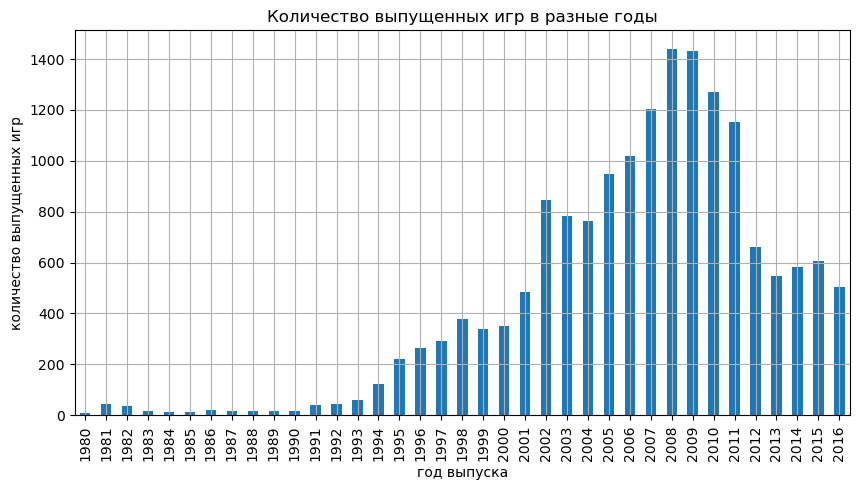

In [27]:
games_by_year.plot.bar(title='Количество выпущенных игр в разные годы', x='year_of_release', xlabel='год выпуска', y='count', ylabel='количество выпущенных игр', figsize=(10, 5), grid=True, legend=False);

Исходя из графика можно заключить, что до 1993 года количество выпускаемых игр было примерно одинаково низким. Эти данные нерелевантны для дальнейшего исследования. С 1993 по 2002 наблюдается рост количества выпущенных игр за исключением 1999 и 2000, когда объемы несколько снизились по сравнению с данными 1998 года. Схожий спад наблюдается в период с 2002 по 2004 гг. А с 2005 по 2008 можно отметить значительное повышения количества релизов с пиком в более 1400, после чего объем выпускаемых игр стал снижаться, сначала незначительно в 2009, а потом все более значимо. Наибольший спад с 2009 года наблюдается в 2012 года, когда количество выпускаемых игр опустилось ниже уровня 2002 года. Динамику выпущенных игр с 2012 по 2016 можно охарактеризовать как неустойчивую, варьирующуюся в районе от 500 до 600.

### Динамика изменений продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
sales_by_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

In [29]:
display(sales_by_platforms)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


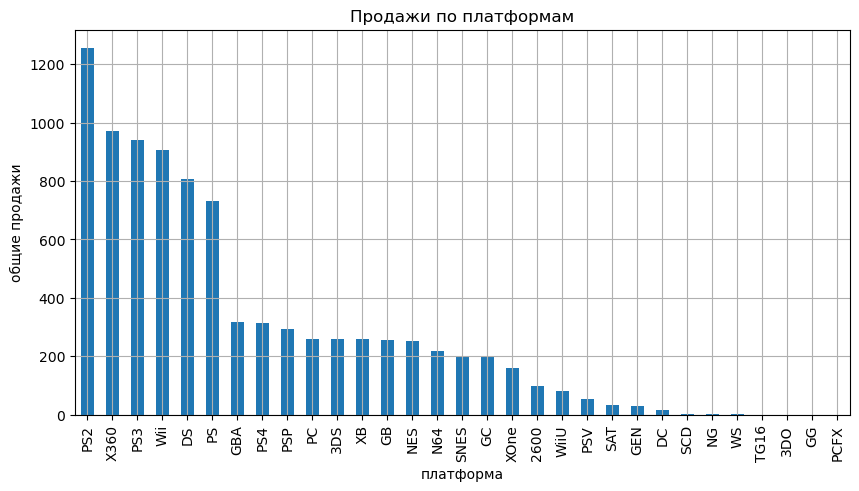

In [30]:
sales_by_platforms.plot.bar(title='Продажи по платформам', xlabel='платформа', ylabel='общие продажи', figsize=(10, 5), grid=True, legend=False);

Наибольшие продажи за весь период демонстрируют PS2, X360, PS3, WII, DS и PS. Их общие продажи превышают отметку в 700млн, при этом остальные платформы едва достигают отметки в 300.

Построим теперь распределение по годам платформ с наибольшими суммарными продажами.

In [31]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False).head(6). reset_index()

In [32]:
display(top_platforms)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [33]:
top_sales = data[data['platform'].isin(top_platforms['platform'])].pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

In [34]:
display(top_sales)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,0.48,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,0.95,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN


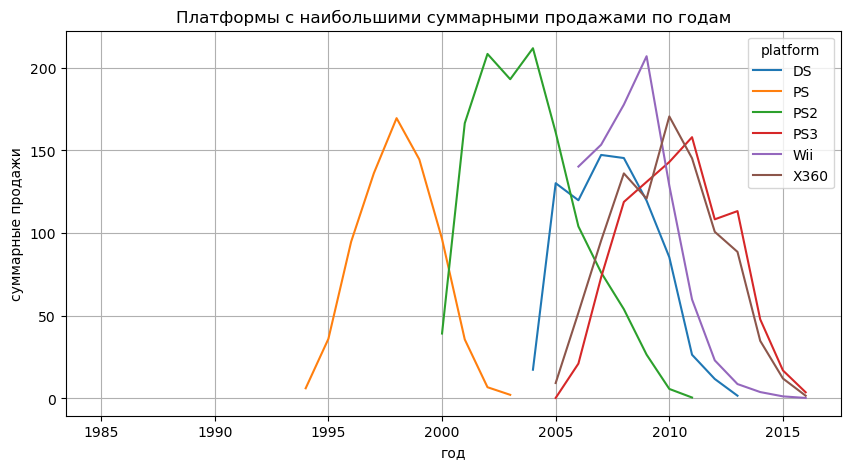

In [35]:
top_sales.plot(title='Платформы с наибольшими суммарными продажами по годам', xlabel='год', ylabel='суммарные продажи',figsize=(10, 5), grid=True);

Исходя из графика можно заключить, что средний цикл существования платформы - примерно 10 лет. При этом продажи сначала растут, затем где-то в середине этого цикла достигают пика, а потом идут на спад. \
На графике заменты также нестандартные циклы, как в случае с платформами PS2, DS и X360. PS2 демонстрирует 2 пика продаж в период с 2000 по 2005 гг. X360 показывает 2 пика различной значимости, первый на отметке 140 и второй, более значительный в 2010 году - более 160. А в случае с DS второй пик сохраняется на отметке в примерно 150 около года.
Наиболее долго на рынке продержались платформы PS2 и PS3. \
Учитывая тот факт, что пик продаж приходится примерно на середину цикла существования (т.е. через примерно 5 лет после релиза), то потенциально прибыльными на 2017 год можно считать платформы, выпущенные в 2011г. и позже. Таким образом, дальнейший анализ будет производитсья на данных с 2011 по 2016 год.

Следует учесть тот факт, что  2 платформы вышли в 2013 году, поэтому стоит сузить рамки исследования до периода 2013-2016гг. Далее исследование будет проводиться на этом срезе.

### Выбор потенциально прибыльных платформ

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [36]:
data_actual = data[data['year_of_release'] > 2012]

In [37]:
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [38]:
data_actual_pivot = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

In [39]:
display(data_actual_pivot)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


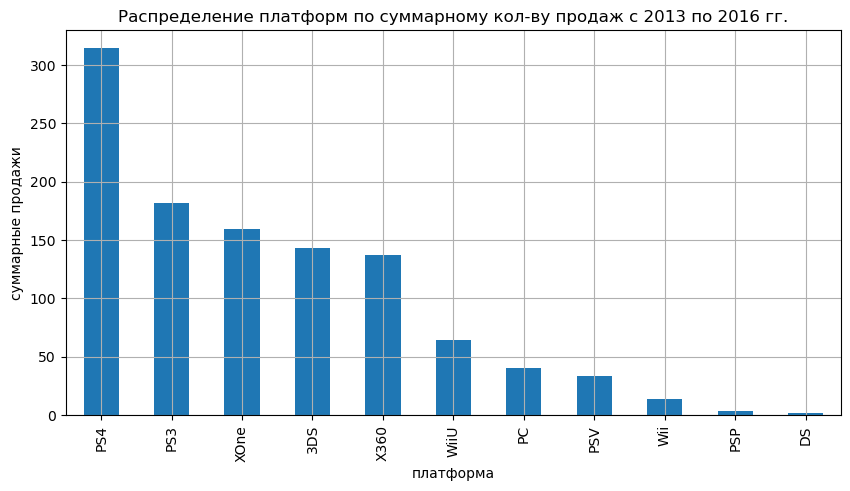

In [40]:
data_actual_pivot.plot.bar(title='Распределение платформ по суммарному кол-ву продаж с 2013 по 2016 гг.', xlabel='платформа', ylabel='суммарные продажи',figsize=(10, 5), grid=True, legend=False);


Наиболее продаваемыми платформами с 2013 по 2016 гг. являются PS4(с большим отрывом), а также PS3, XOne, 3DS и X360. Также следует включить и WiiU.

Далее рассмотрим график распределения продаж по годам.

In [41]:
top_sales_actual = data_actual.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

In [42]:
display(top_sales_actual)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Судя по графику, продажи всех платформ к 2016 году падают. Наиболее явный спад демонстрируют продажи платформы PS3 и X360.

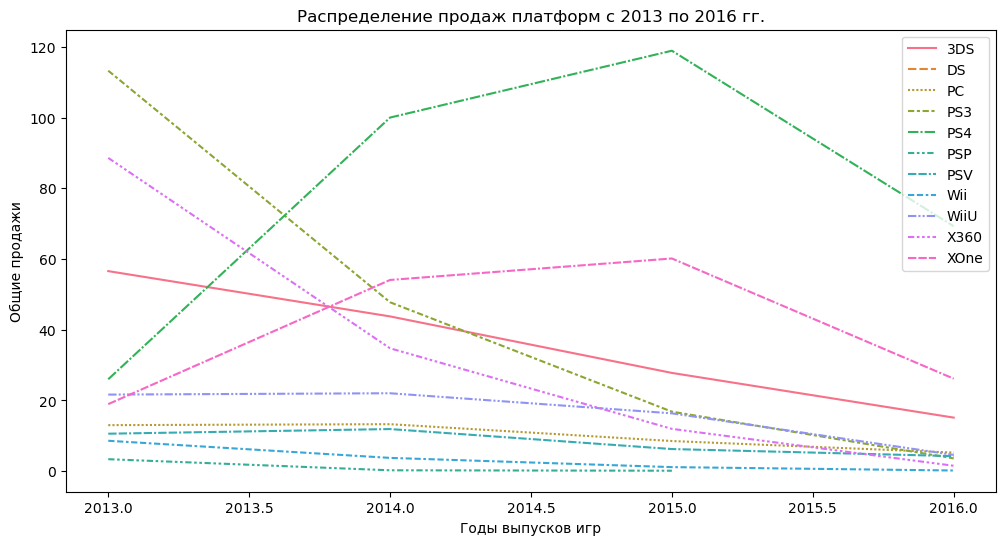

In [43]:
plt.figure(figsize=(12,6))
plt.title('Распределение продаж платформ с 2013 по 2016 гг.')
plt.xlabel('Годы выпусков игр')
plt.ylabel('Общие продажи')
sns.lineplot(data = top_sales_actual)
plt.legend()
plt.show()

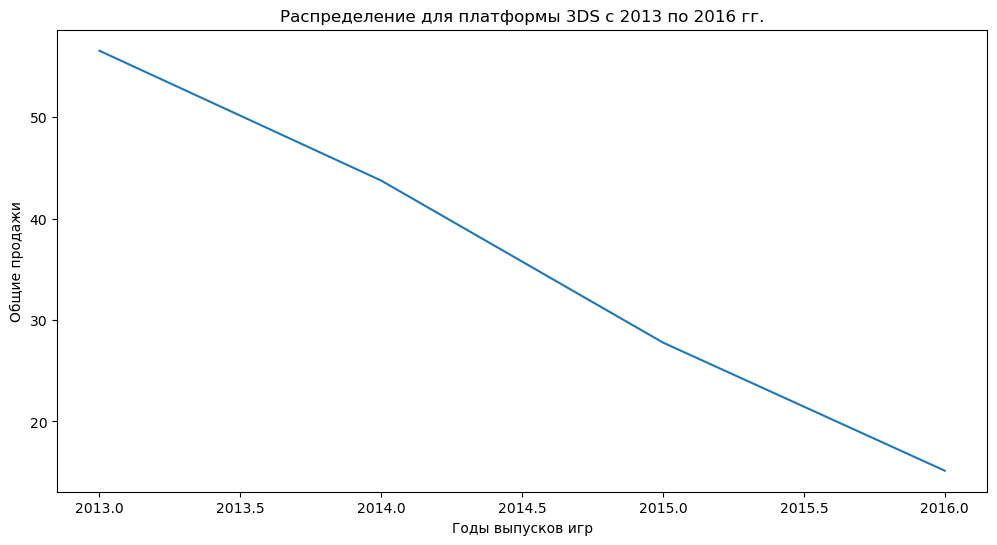

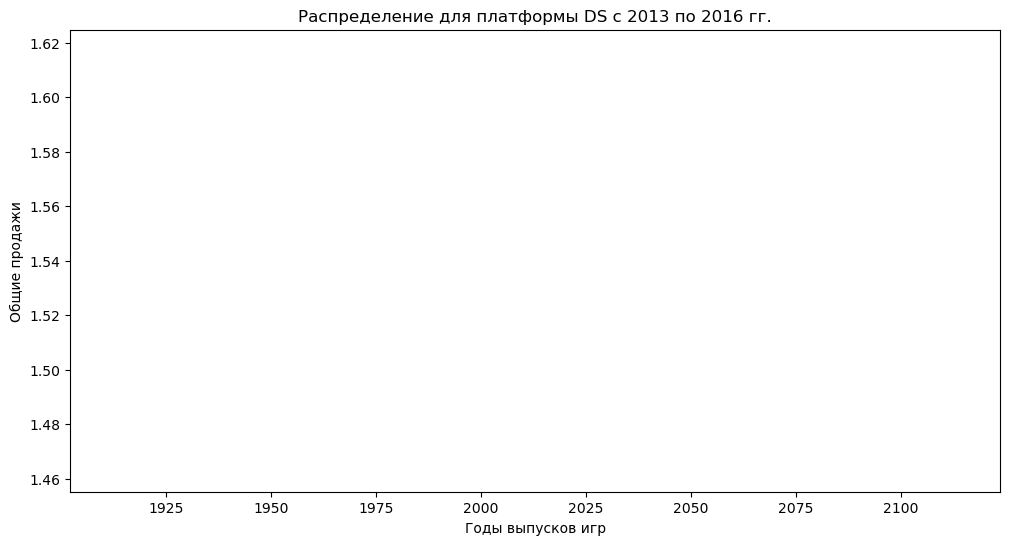

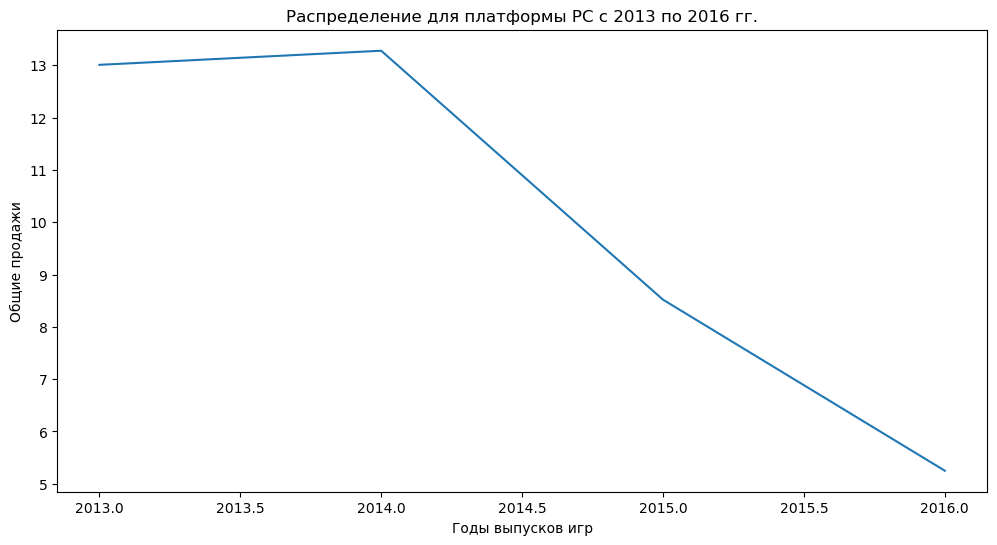

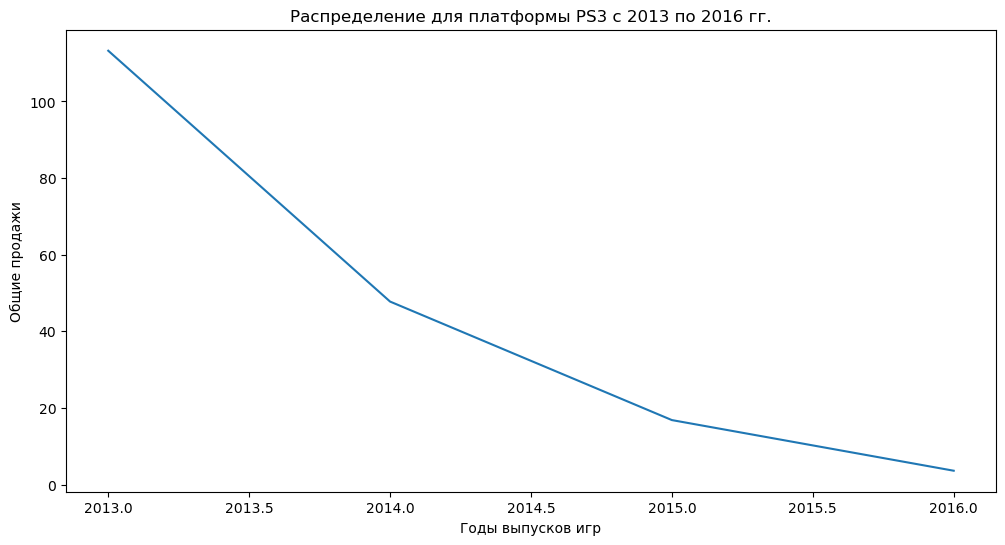

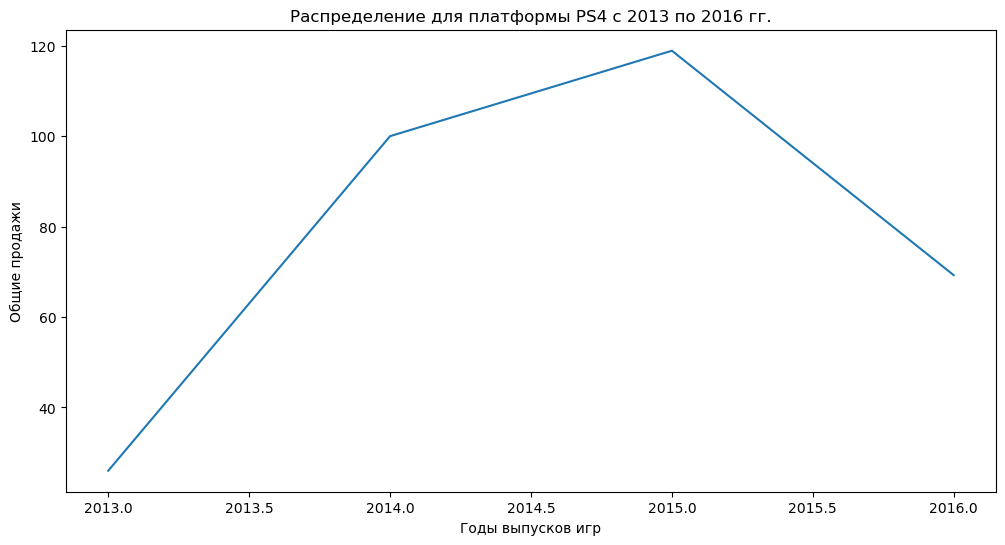

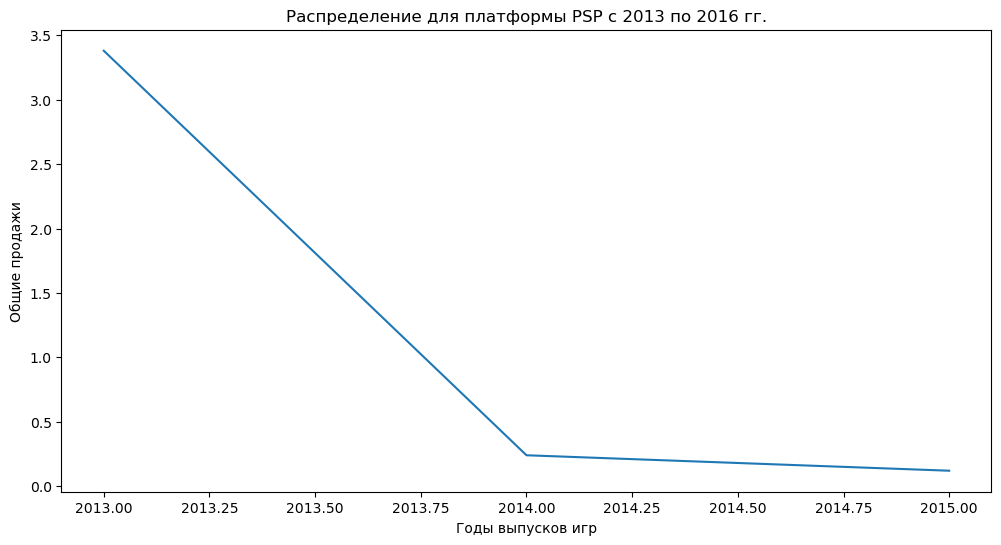

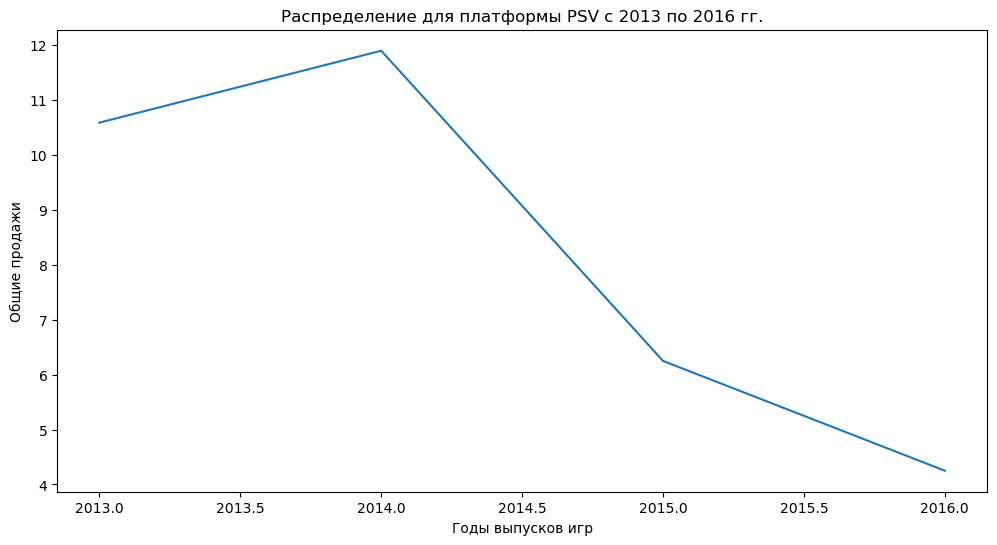

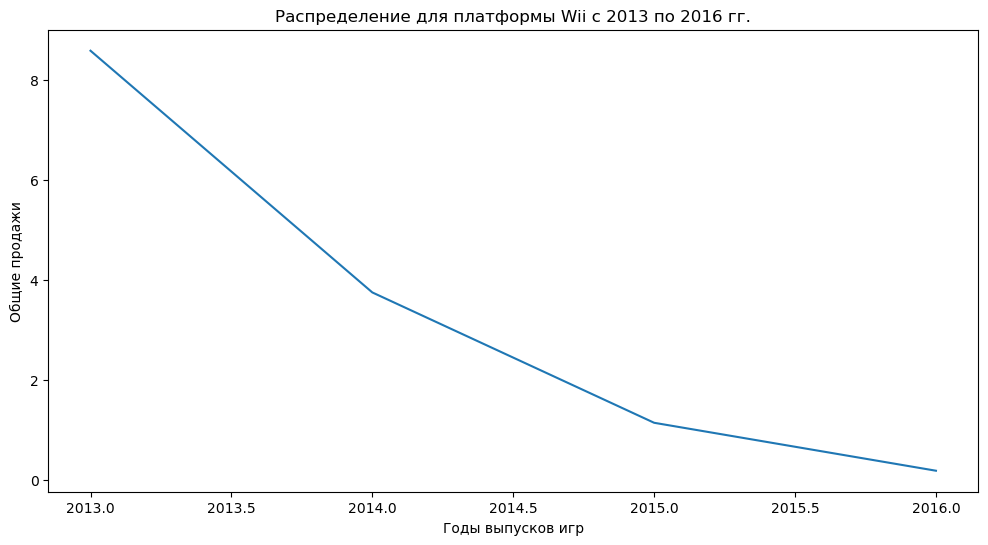

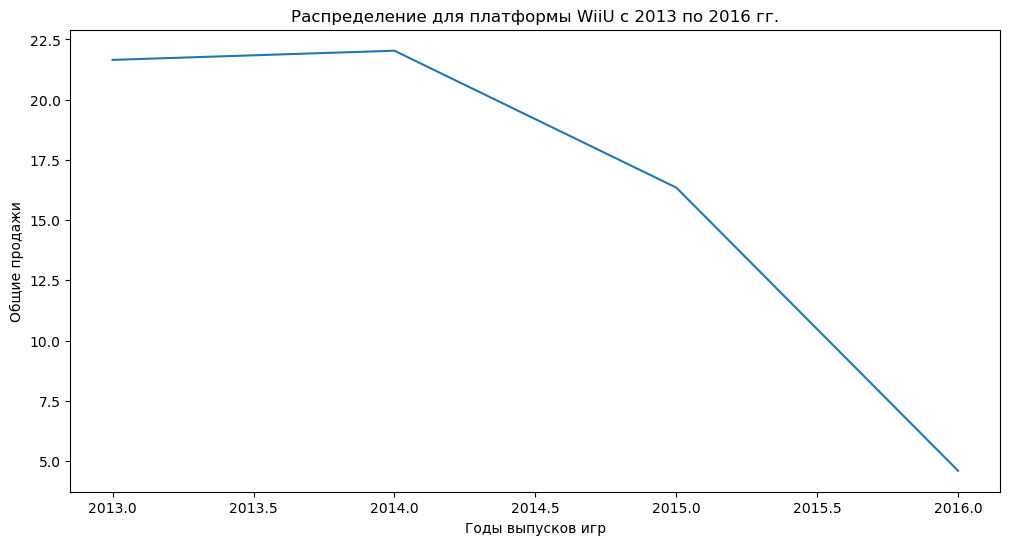

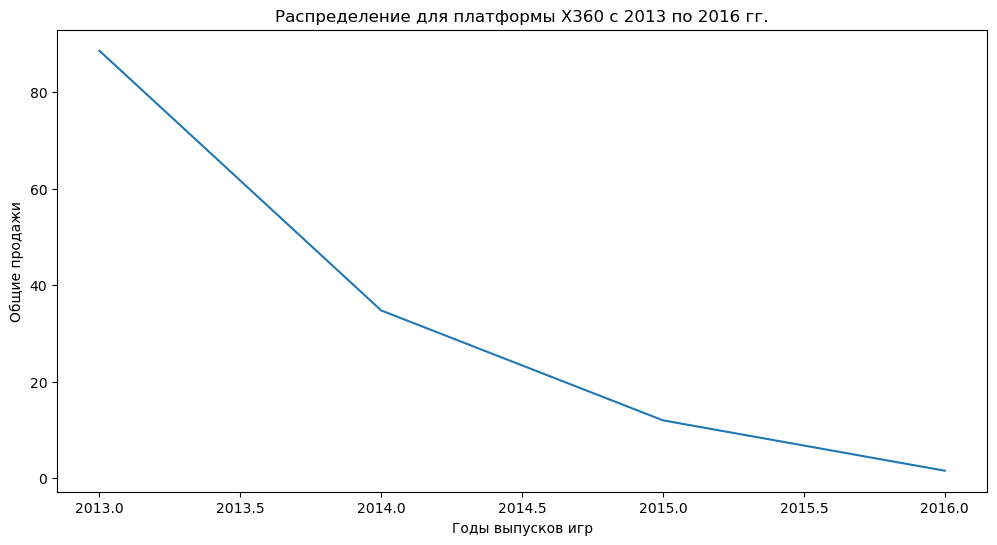

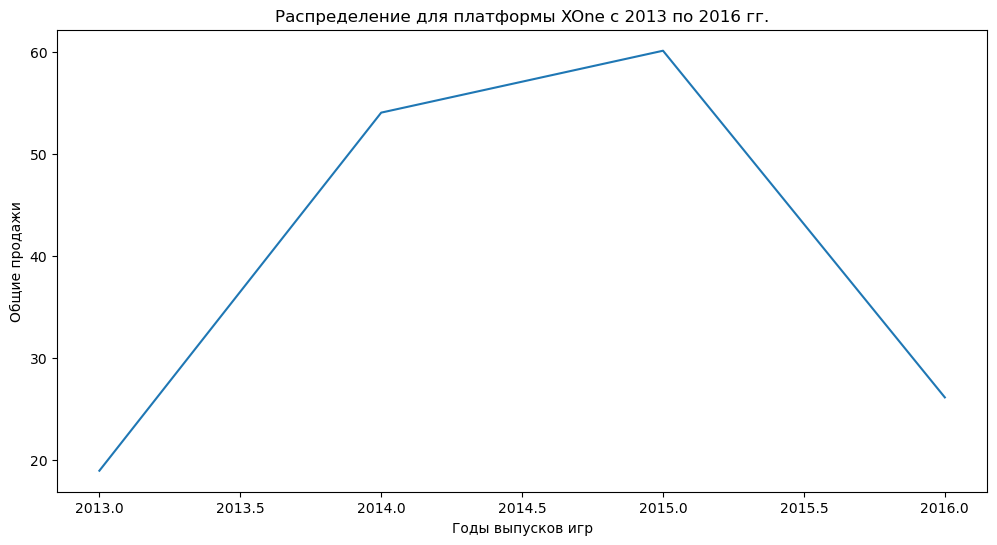

In [44]:
for platform in top_sales_actual.columns:
    plt.figure(figsize=(12,6))
    plt.title(f'Распределение для платформы {platform} с 2013 по 2016 гг.')
    plt.xlabel('Годы выпусков игр')
    plt.ylabel('Общие продажи')
    sns.lineplot(data = top_sales_actual, x=top_sales_actual.index, y=platform)
    plt.show()

Судя по графику, продажи всех платформ к 2016 году падают. 
Наиболее явный спад демонстрируют продажи платформы PS3 и X360. Они явно не перспективны.
Также можно исключить DS и PSP, так как их продажи остановились в 2013 и 2015 гг. соответственно.
PS2 можно отбросить, так кк даже более новый аналог PS3 демонстрирует явный спад.
Таким же образом можно поступить с Wii, так как есть более новая модель WiiU, выпущенная в 2012 году.

Таким образом, наиболее перспективными платформами можно считать оставшиеся: 3DS, PC, PS4, PSV, WiiU, XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [45]:
top_6_platforms = ['PS4','XOne','X360','WiiU','3DS', 'PS3']
top_6 = data[data['platform'].isin(['PS4','XOne','X360','WiiU','3DS', 'PS3'])]

In [46]:
display(top_6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


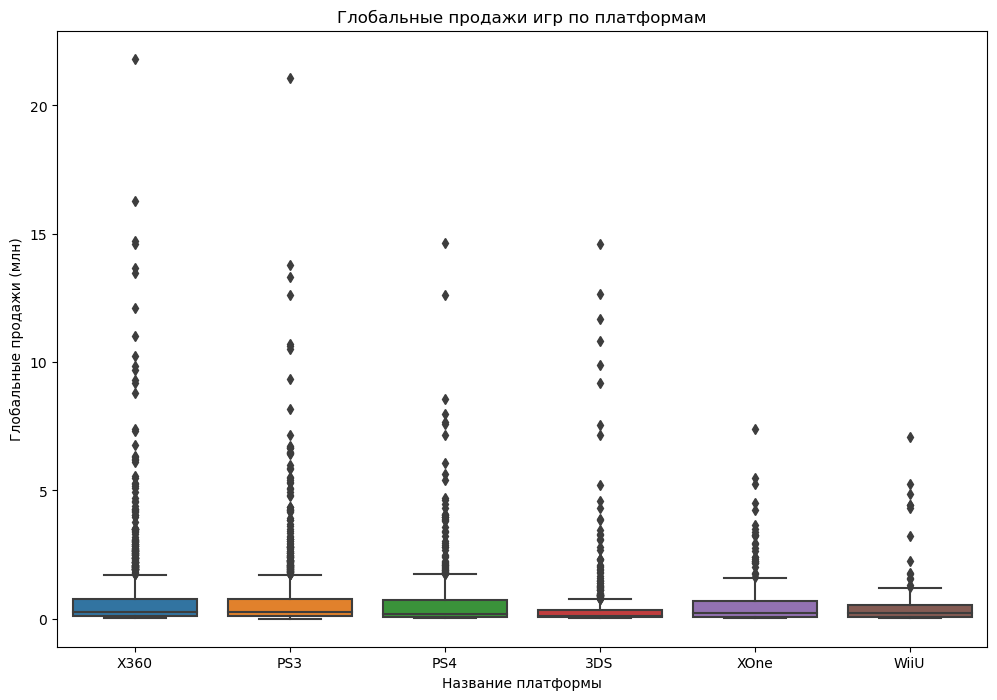

In [47]:
plt.figure(figsize=(12,8))
plt.title('Глобальные продажи игр по платформам', fontsize=12)
sns.boxplot(data = top_6, x='platform', y='total_sales')
plt.xlabel('Название платформы')
plt.ylabel('Глобальные продажи (млн)')
#plt.legend()
plt.show()

Из-за большой доли выбросов невозможно описать график. Необходимо ограничить данные до 2 млн. проданных копий, так как ни одни усы ящика не выходят за этот предел. Для этого нужно перезаписать переменную с учетом ограничения до 2 млн.

In [48]:
top_6 = top_6[top_6['total_sales'] < 2].sort_values(by='total_sales', ascending=False)

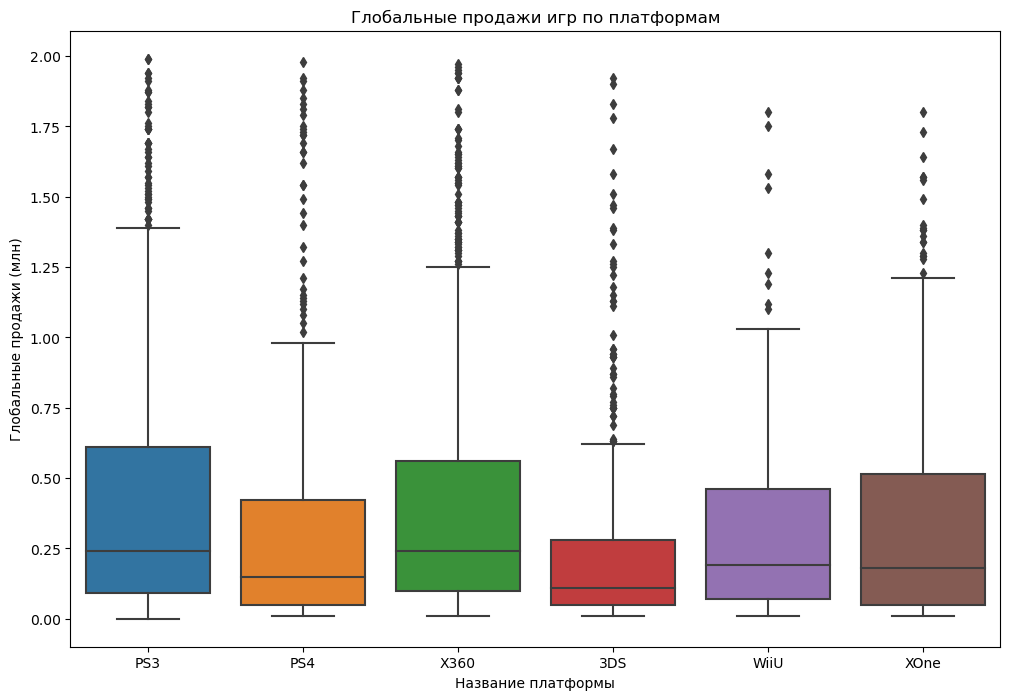

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data = top_6, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам', fontsize=12)
plt.xlabel('Название платформы')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

Судя по графику, наибольшие продажи игр демонстрируют платформы PS3. На втором и третьем месте по продажам XOne и X360 соответственно.
Далее по убыванию следуют WiiU, PS4 и 3DS.

Популярность игр для платформ WiiU и XOne можно объяснить тем, что они выли выпущены сравнительно недавно (2013г)/
Также PS4 вышла недавно, но более низкий уровень продаж игр можно объяснить тем, что в 2013 году еще была в ходу предыдущая модель - PS3. 

Вернемся к выводу о том, что цикл жизни платформы составляет примерно 10 лет с пиком около 5. Исходя из того, что плафторма XOne вышла в 2013, она близка к своему пику. Данные графика это подтверждают. При этом платформы с большими продажами ранее на графике демонстрировали резкий спад, что говорит о близости завершения их циклов, например, PS3 и X360.  Поэтому определилим, что наиболее перспективной игровой платформой является XOne.

### Влияние отзывов пользователей и критиков на продажи внутри платформы XOne 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [50]:
xone = data[data['platform'] == 'XOne']

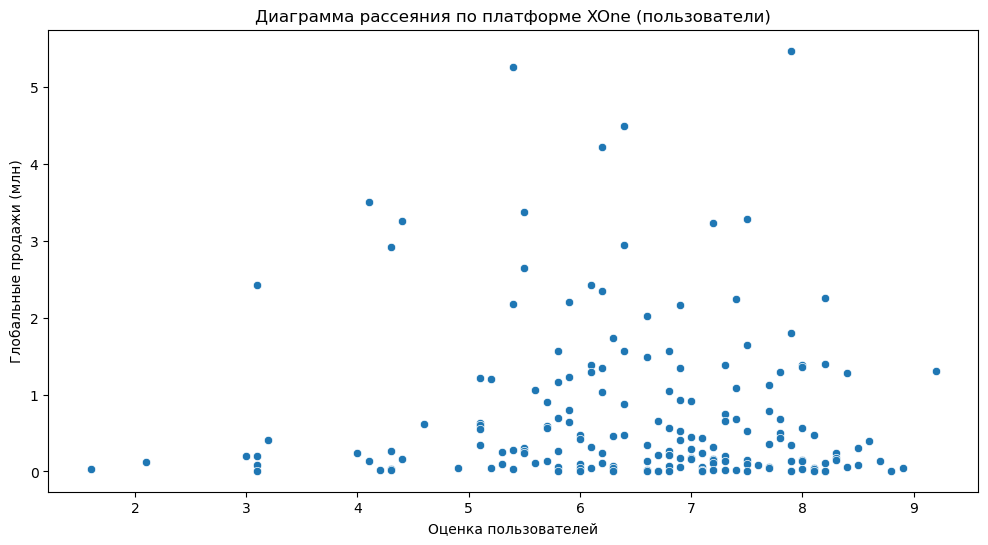

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = xone, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе XOne (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [52]:
print('Коэффициент корреляции:', xone['user_score'].corr(xone['total_sales']))

Коэффициент корреляции: -0.06892505328279414


Коэфф. корреляции Пирсона  является отрицательным и стремится к 0, что свидетельствует об отсутствии корреляции между оценками пользователей и глобальными продажами.

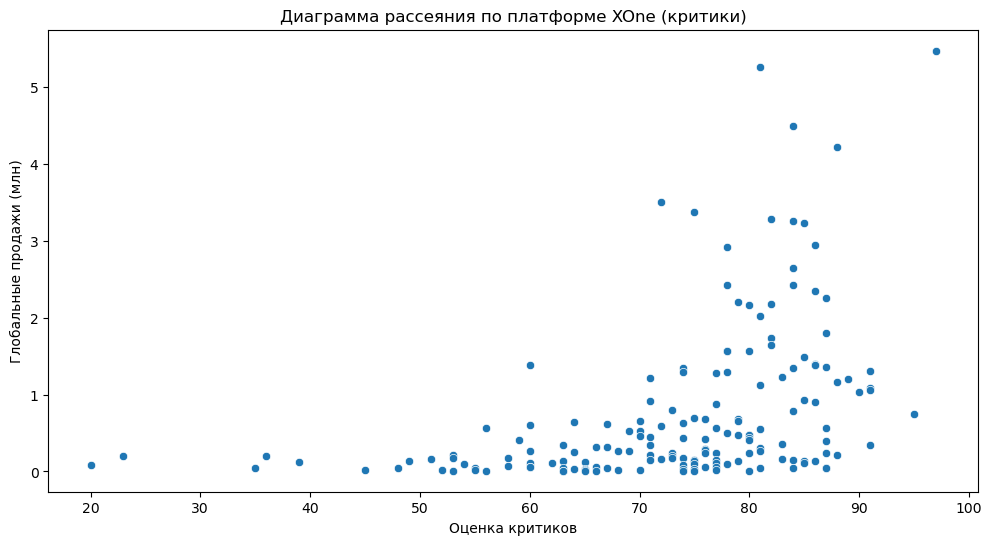

In [53]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = xone, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе XOne (критики)', fontsize=12)
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [54]:
print('Коэффициент корреляции:', xone['critic_score'].corr(xone['total_sales']))

Коэффициент корреляции: 0.4169983280084017


Коэфф. корреляции Пирсона = 0.4, что свидетельствует о слабой корреляции между оценками критиков и глобальными продажами. 

Судя по графикам и коэф. корреляции, отсутствует корреляция между оценками пользователей и критиков и глобальными продажами.

### Соотнесение выводов с продажами на других платформах

Соотнесите выводы с продажами игр на других платформах: 'PS4','PC','WiiU','3DS', 'PSV'

#### PS4

In [55]:
ps4 = data[data['platform'] == 'PS4']

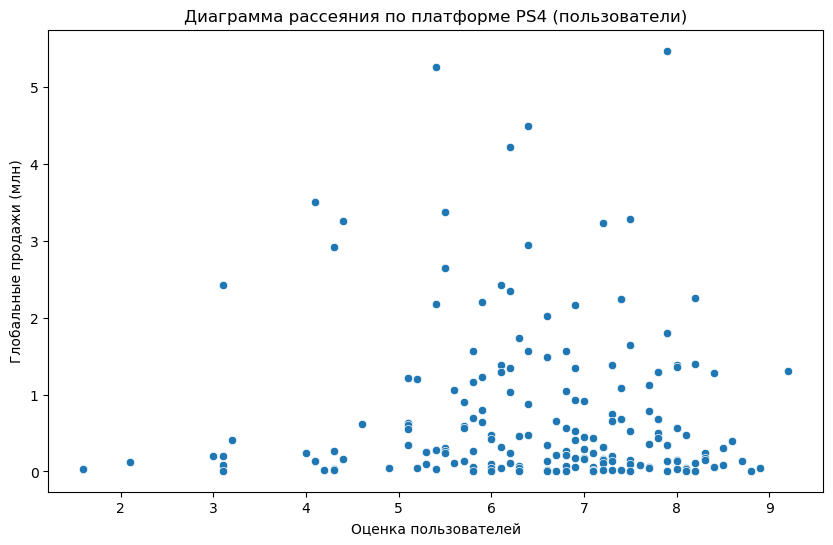

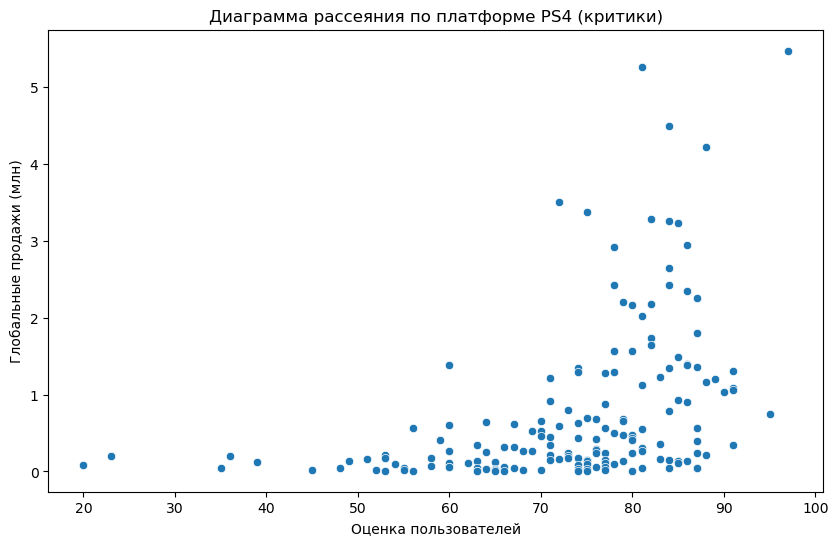

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = xone, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе PS4 (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data = xone, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе PS4 (критики)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [57]:
print('Коэффициент корреляции:', ps4['user_score'].corr(ps4['total_sales']))

Коэффициент корреляции: -0.031957110204556376


Коэфф. корреляции Пирсона отрицательный и стремится к нулю, это свидтельствует о крайне слабой корреляции между оценками пользователей и глобальными продажами.

In [58]:
print('Коэффициент корреляции:', ps4['critic_score'].corr(ps4['total_sales']))

Коэффициент корреляции: 0.40656790206178095


Коэфф. корреляции Пирсона = 0.4, что свидетельствует о слабой корреляции между оценками критиков и глобальными продажами.

#### PS3

In [59]:
ps3 = data[data['platform'] == 'PS3']

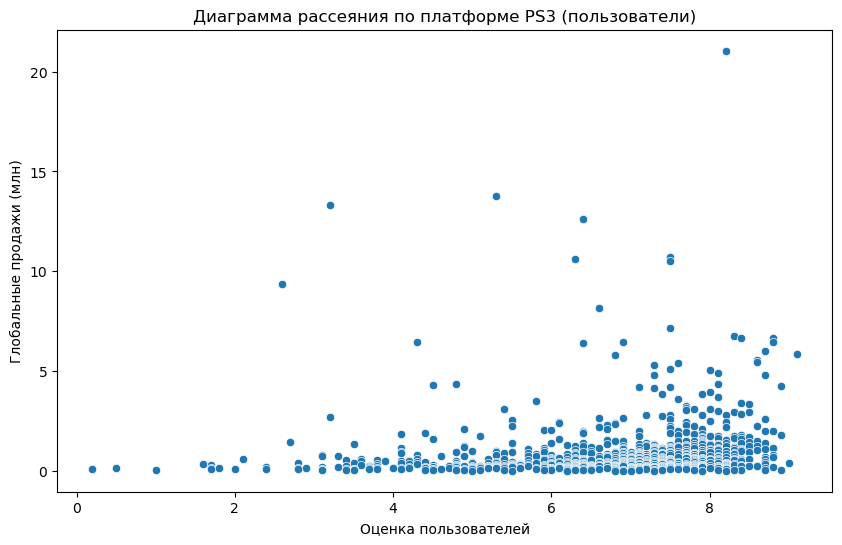

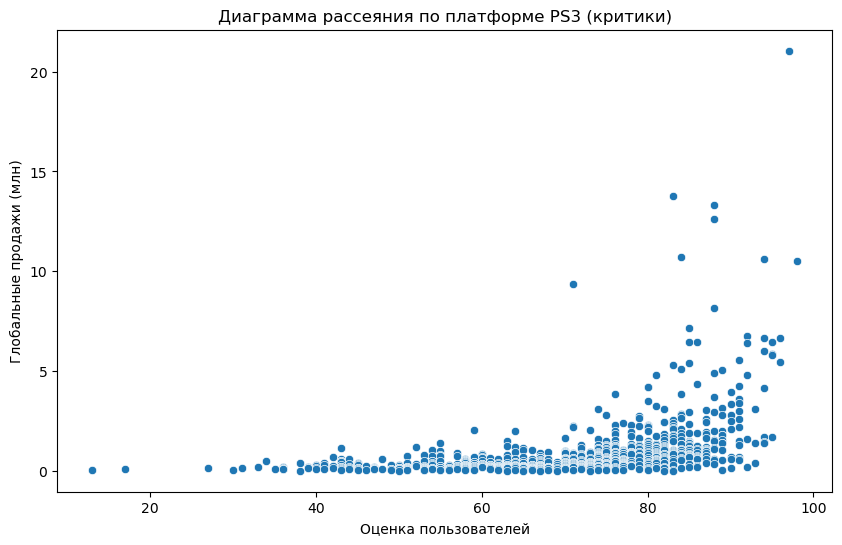

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = ps3, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе PS3 (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data = ps3, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе PS3 (критики)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [61]:
print('Коэффициент корреляции:', ps3['user_score'].corr(ps3['total_sales']))

Коэффициент корреляции: 0.12669133936341692


Коэфф. корреляции Пирсона = 0.1, это свидетельствует о крайне слабой корреляции между оценками пользователей и глобальными продажами.

In [62]:
print('Коэффициент корреляции:', ps3['critic_score'].corr(ps3['total_sales']))

Коэффициент корреляции: 0.43243156856420634


Коэфф. корреляции Пирсона = 0.4, это свидетельствует о слабой корреляции между оценками критиков и глобальными продажами.

#### WiiU

In [63]:
wiiu = data[data['platform'] == 'WiiU']

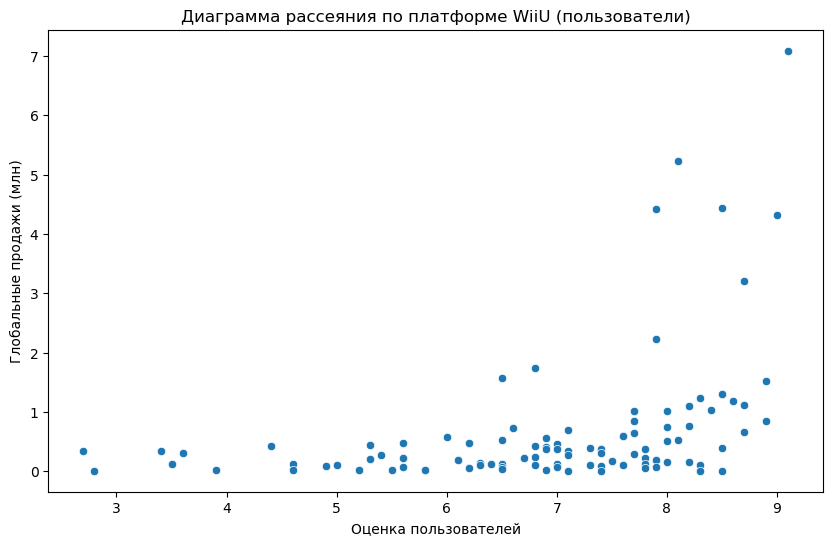

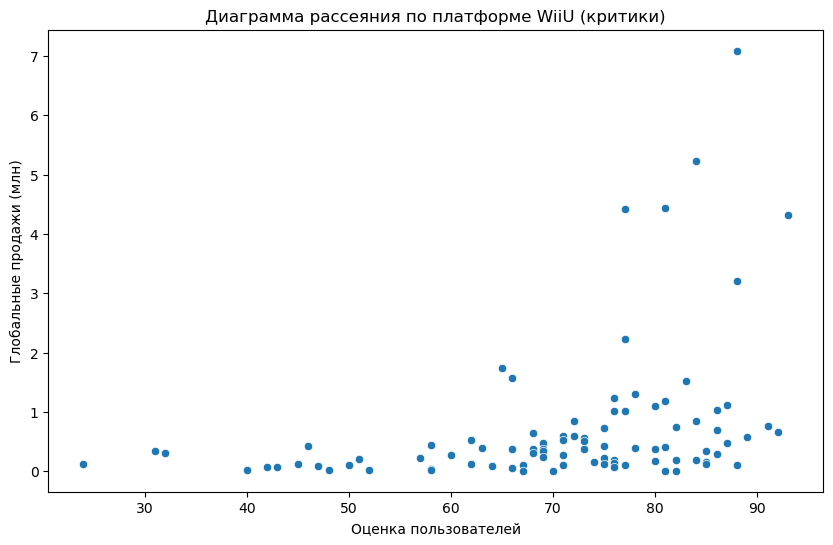

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = wiiu, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе WiiU (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data = wiiu, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе WiiU (критики)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [65]:
print('Коэффициент корреляции (оценки пользователей - продажи):', wiiu['user_score'].corr(wiiu['total_sales']))

Коэффициент корреляции (оценки пользователей - продажи): 0.4002190202148617


Коэфф. корреляции Пирсона = 0.4, что свидетельствует о слабой корреляции между оценками пользователей и глобальными продажами.

In [66]:
print('Коэффициент корреляции (оценки критиков - продажи):', wiiu['critic_score'].corr(wiiu['total_sales']))

Коэффициент корреляции (оценки критиков - продажи): 0.34837976012017485


Коэфф. корреляции Пирсона = 0.3, что свидетельствует о крайне слабой корреляции между оценками критиков и глобальными продажами.

#### 3DS

In [67]:
three_ds = data[data['platform'] == '3DS']

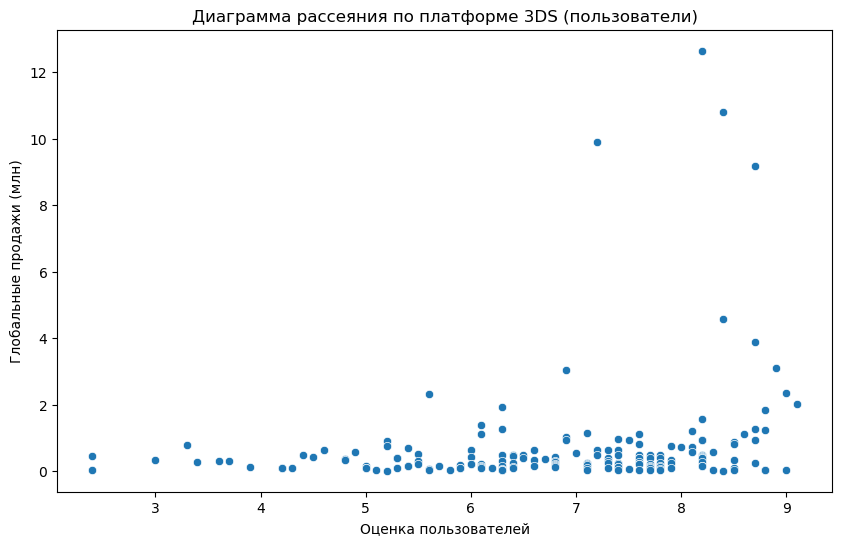

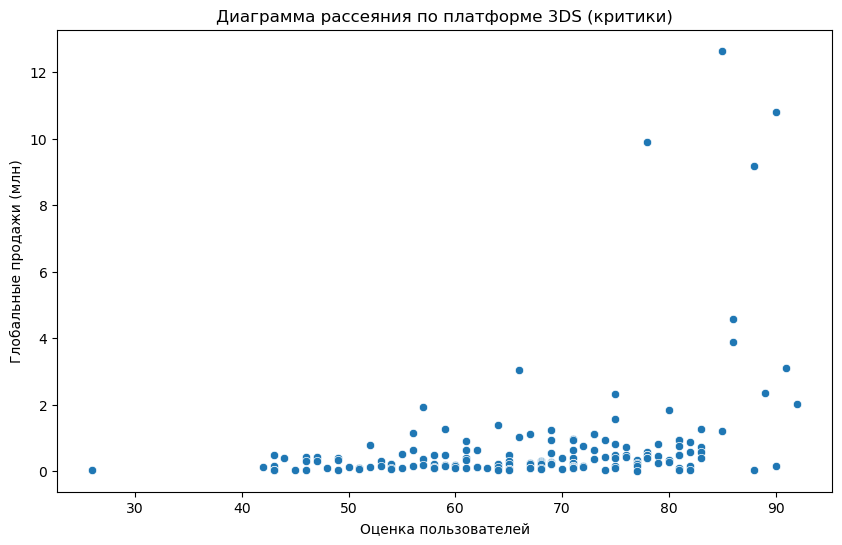

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = three_ds, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе 3DS (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data = three_ds, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе 3DS (критики)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [69]:
print('Коэффициент корреляции (оценки пользователей - продажи):', three_ds['user_score'].corr(three_ds['total_sales']))
print('Коэффициент корреляции (оценки критиков - продажи):', three_ds['critic_score'].corr(three_ds['total_sales']))

Коэффициент корреляции (оценки пользователей - продажи): 0.22480798039571082
Коэффициент корреляции (оценки критиков - продажи): 0.3494009303924131


В обоих случая коэфф. корр. Пирсона крайне низкий, что свидетельсвует об очень слабой положительной корреляции между оценками пользователей и критиков и продажами.

#### X360

In [70]:
x360 = data[data['platform'] == 'X360']

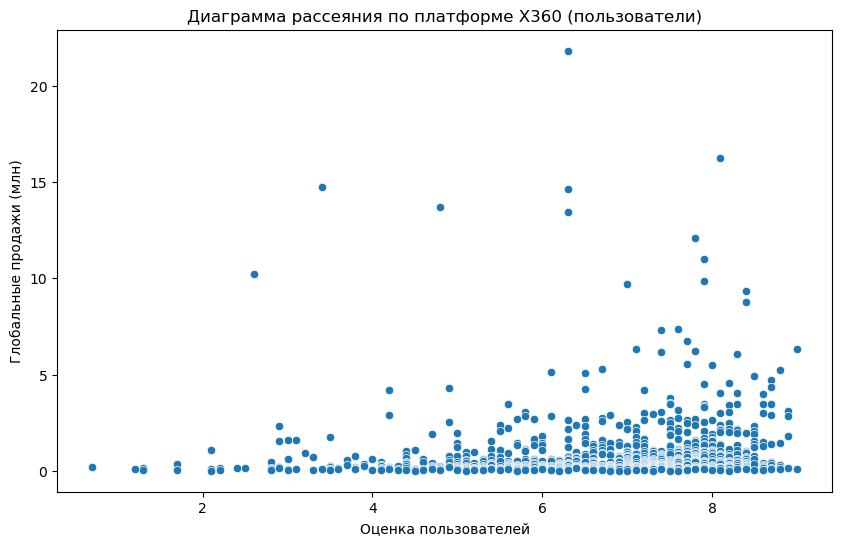

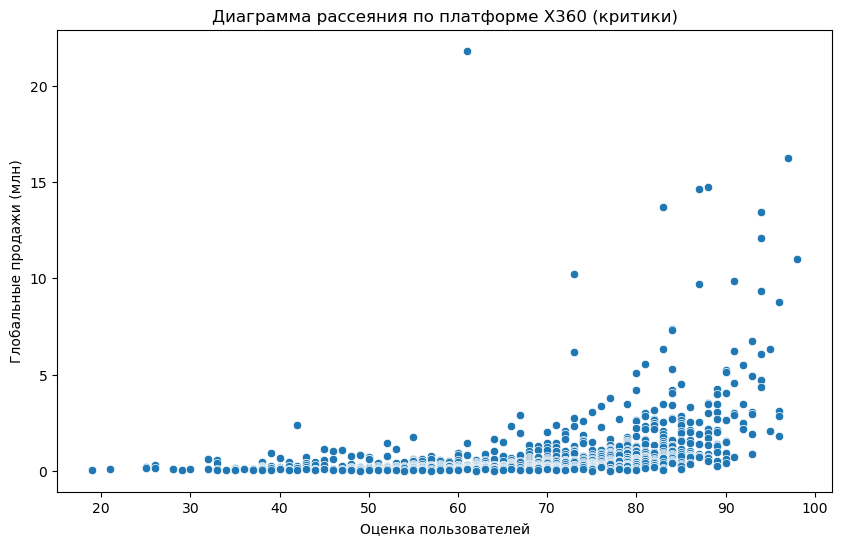

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = x360, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе X360 (пользователи)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data = x360, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния по платформе X360 (критики)', fontsize=12)
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.show()

In [72]:
print('Коэффициент корреляции (оценки пользователей - продажи):', x360['user_score'].corr(x360['total_sales']))
print('Коэффициент корреляции (оценки критиков - продажи):', x360['critic_score'].corr(x360['total_sales']))

Коэффициент корреляции (оценки пользователей - продажи): 0.11445882978454186
Коэффициент корреляции (оценки критиков - продажи): 0.3937358653072584


Коэф. корреляции Пирсона в первом случае свидетельсвует о крайне слабой корреляции, а во втором - о слабой положительной корреляции между оценками пользователей и критиков и продажами. 


**Общий вывод**:
Корреляция между оценками пользователей и критиков и продажами по вышеперечисленным платформам ранжируется от нулевой до слабой. Можно сделать вывод, что оценки критиков и пользователей практически не оказывают влияния на глобальные продажи. В качестве исключения можно выделить платформы XOne, PS3 и X360, при анализе которых была отмечена слабая корреляция между оченками критиков и продажами, что говорит о том, что покупатели игр обращают внимание на мнение критиков, и платформу WiiU, при покупке игр для которой пользователя обращают внимание на оценки других пользователей.

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [73]:
games_by_genre = data_actual.groupby('genre')['name'].agg('count').reset_index()
games_by_genre.columns = ['genre', 'count']

In [74]:
display(games_by_genre.sort_values(by='count', ascending=False).reset_index(drop=True))

,genre,count
0,Action,769
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,156
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


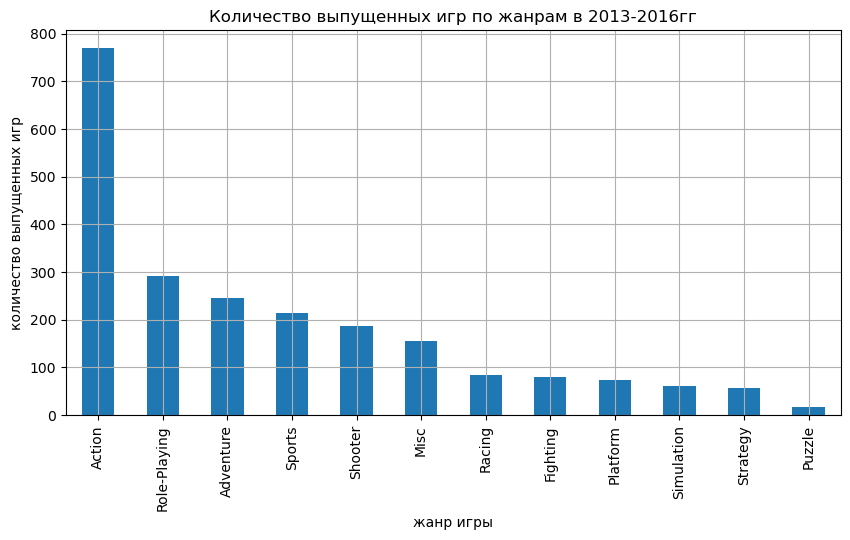

In [75]:
games_by_genre.sort_values(by='count', ascending=False).plot.bar(title='Количество выпущенных игр по жанрам в 2013-2016гг', x='genre', xlabel='жанр игры', y='count', ylabel='количество выпущенных игр', figsize=(10, 5), grid=True, legend=False);

По количеству продаж по жанру лидирует жанры экш, далее с большим отрывом идут все остальные жанры игры. Наименьшие продажи можно отметить в жанрах стратегии и паззла.

In [76]:
sales_by_genre = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)

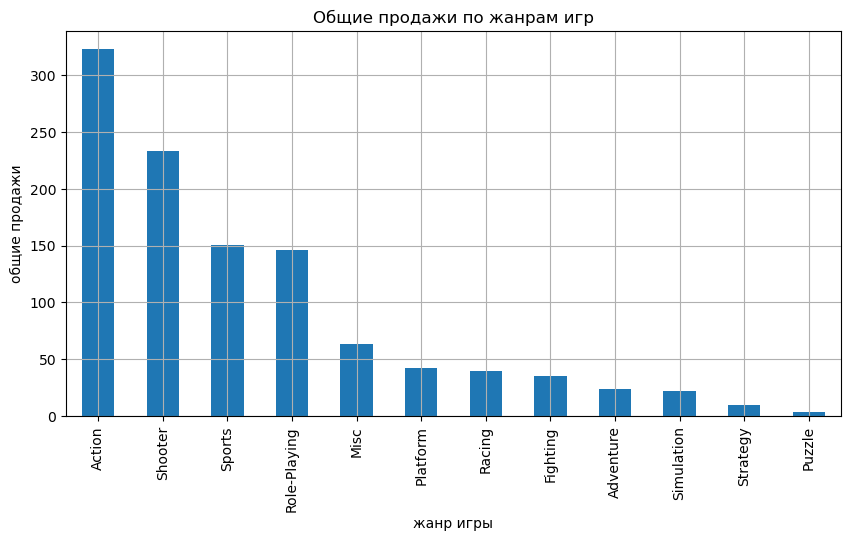

In [77]:
sales_by_genre.plot.bar(title='Общие продажи по жанрам игр', xlabel='жанр игры', ylabel='общие продажи', figsize=(10, 5), grid=True, legend=False);


График демонстрирует, что наиболее часто покупают игры в жанре экшн и шутер. За ними по популярности идут спортивные и ролевые игры. Наиболее низкие продажи демонстрирует игры в жанрах strategy и puzzle.

In [78]:
median_sales_by_genre = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by = 'total_sales', ascending = False)

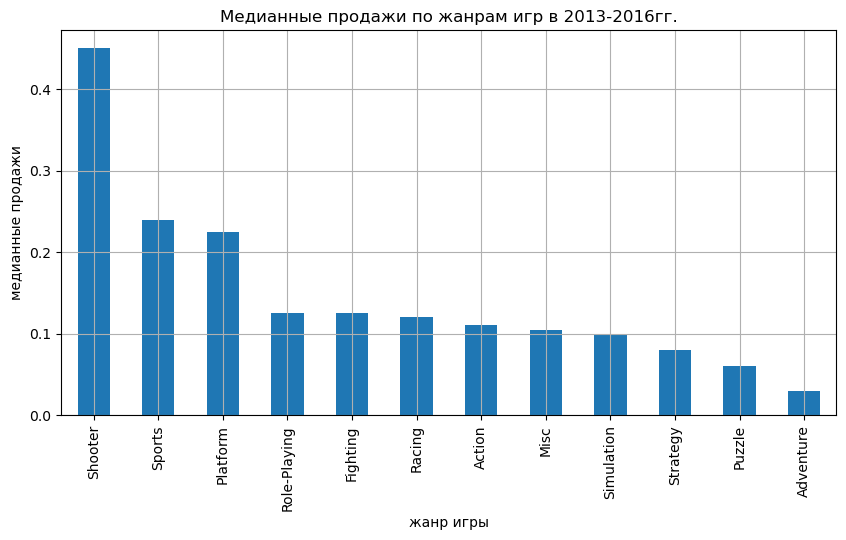

In [79]:
median_sales_by_genre.plot.bar(title='Медианные продажи по жанрам игр в 2013-2016гг.', xlabel='жанр игры', ylabel='медианные продажи', figsize=(10, 5), grid=True, legend=False);

Согласно графику, наиболее популярной по количеству медианных продаж является игры жанре шутер. Медианные значения более надежны для анализа, так как позволяют избежать выбросов. Далее с большим отрывом идут игры в жанрах спортивные, платформеры. Наименьшие продажы у adventure.

**Общий вывод**:

По количеству выпущенных игр за все годы лидирует экш, далее с большим отрывом идут все остальные жанры. Наименьшие количество релизов стратегии и паззла. 

По суммарным продажам лидируют экшн и шутер. Наиболее низкие продажи у игр в жанрах adventure, strategy и puzzle. 

Важно отметить ,что при анализе продаж важно избежать возмождных выбросов, поэтому были также проанализированы медианные продажи: среди них абсолютным лидером является  шутер. А минимальные продажи у adventure.

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP): 
- Самые популярные платформы (топ-5). Опишите различия в долях продаж. 
- Самые популярные жанры (топ-5). Поясните разницу. 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### NA (Северная Америка)

Продолжаем работать только с актуальными данные (с 2013 года).

In [80]:
popular_platforms_in_na = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)

In [81]:
display(popular_platforms_in_na)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


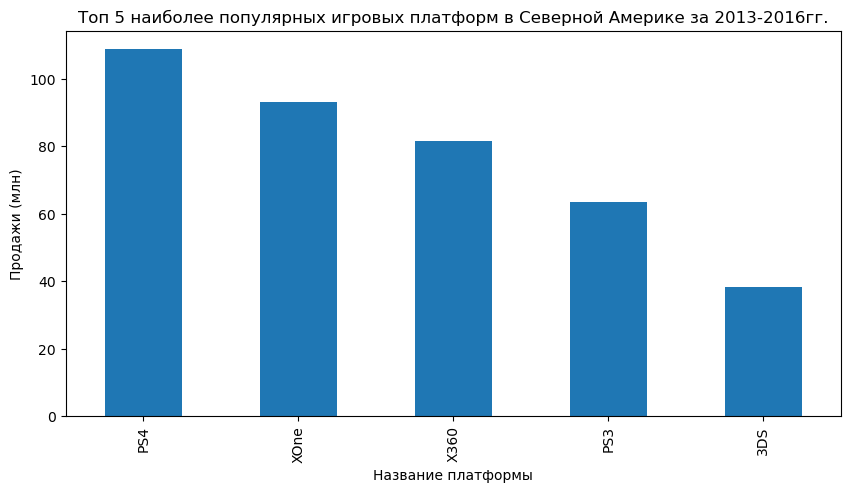

In [82]:
popular_platforms_in_na.plot.bar(
    title= 'Топ 5 наиболее популярных игровых платформ в Северной Америке за 2013-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

In [83]:
popular_genres_in_na = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)

In [84]:
display(popular_genres_in_na)

,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


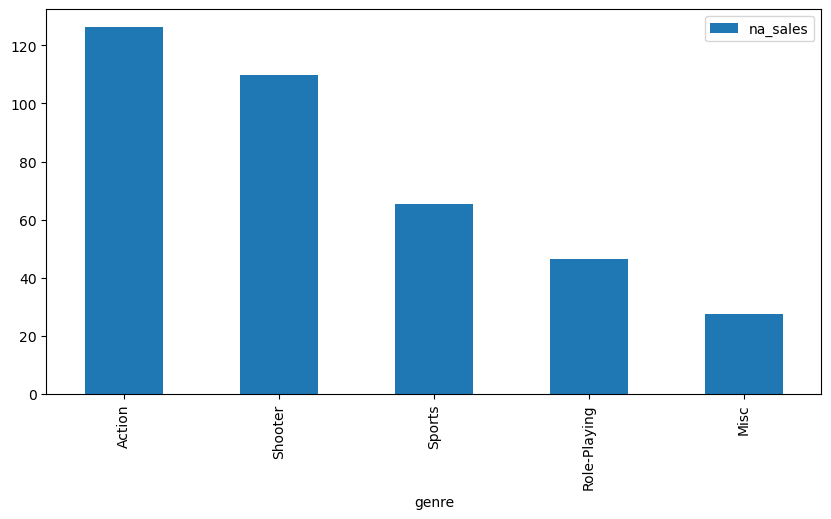

In [85]:
popular_genres_in_na.plot.bar(figsize=(10,5));

Топ-5 наиболее полулярных жанров игр в Северной Америке: экшн, шутер, спорт, ролевые и смешанный(misc).

In [86]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [87]:
rating_in_na = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False)


In [88]:
display(rating_in_na)

,na_sales
rating,
M,165.29
E,79.05
E10+,54.24
T,49.79


Для описания данных следует обратиться к расшифровкам категорий ретинга. Согласно официальному сайту:

E - everyone(для всех)\
E10+ - everyone 10+ (для всех от 10+)\
M - mature(17+)\
T - teen (для тинейджеров)\
EC - early childhood (для детей 3+)\
RP - rating pending (еще не имеют официальных данных рейтинга)

Поскольку в данном столбце присутствует значительное количество пропусков, можно предположить, что данные еще формируются и добавить их в категорию RP, где судя по предварительному анализу нет ни одной игры.

In [89]:
data_actual['rating'] = data_actual['rating'].fillna('RP')
display(data_actual['rating'].value_counts())
display(data_actual['rating'].isna().sum())

C:\Users\Neunerin\AppData\Local\Temp\ipykernel_19552\3002844549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['rating'] = data_actual['rating'].fillna('RP')


RP      978
M       372
T       333
E       302
E10+    252
Name: rating, dtype: int64

0

In [90]:
rating_in_na = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False)

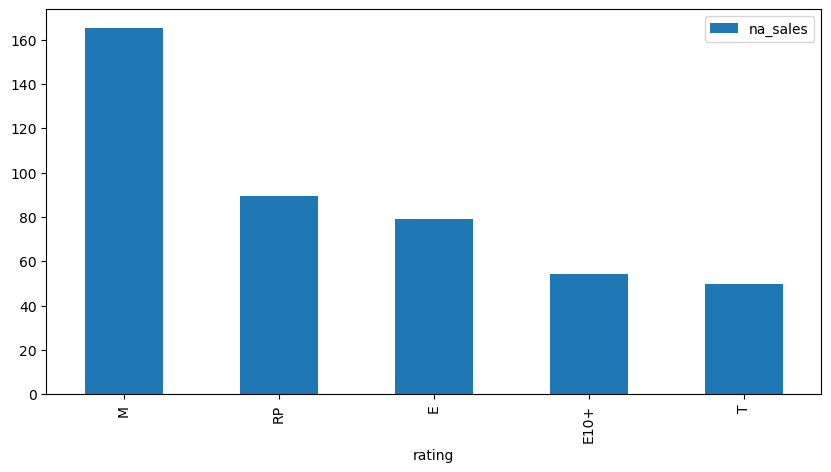

In [91]:
rating_in_na.plot.bar(figsize=(10,5));

Наиболее продаваемыми в Северной америке являются игры с рейтингом (17+) - их абсолютное большинство, их число в 2 раза превышает все остальные категории. На втором месте игры для всех без ограничения возраста, на 3,4 и 5 примерно с одинаковыми продажами располагаются игры, для которых рейтинг еще формируется, игры для всех от 10 лет и игы для тинейджеров соответственно.

#### Портрет пользователя Северной Америки 2013-2016гг.

1. Наиболее популярные игровые **платформы**: PS4, XOne, X360, PS3 и 3DS. 
*Поскольку в рейтинг попали PS3 и PS4, следует посмотреть данные за меньший срок (2015-2016гг), так как 4-е поколение платформы предположительно должно со временем вытеснять 3-е.*

2. Топ-5 самых полулярных игровых **жанров**: экшн, шутер, спорт, ролевые и смешанный(misc).\
3. Наиболее продаваемыми являются игры с **рейтингом** (17+), на 2-м месте игры без рейтинга, на 3 "для всех" без ограничения возраста, на 4 и 5 примерно с одинаковыми продажами располагаются игры "для всех (10+)" и игры для тинейджеров соответственно.


### EU (Европа)

In [92]:
top5_platforms_in_eu = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)

In [93]:
display(top5_platforms_in_eu)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


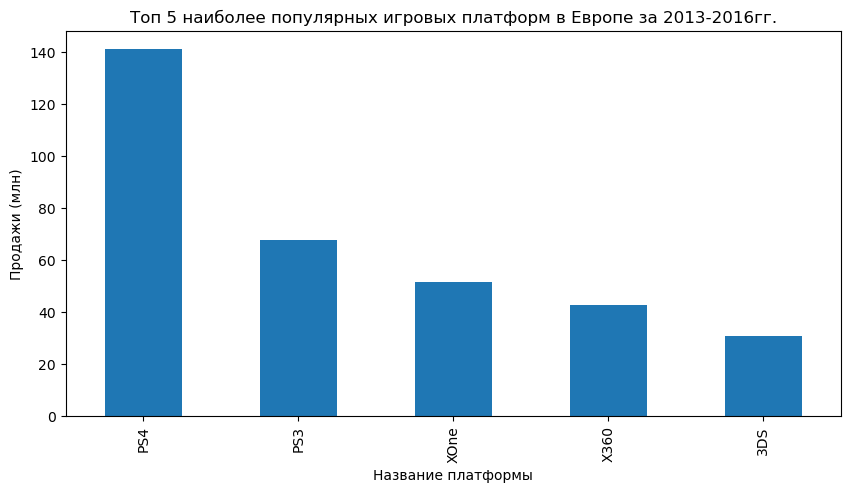

In [94]:
top5_platforms_in_eu.plot.bar(
    title='Топ 5 наиболее популярных игровых платформ в Европе за 2013-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

График демонстрирует, что наиболее популярными платформами в Европе являются PS4, PS3, XOne, X360, 3DS. 

In [95]:
popular_genres_in_eu = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)

In [96]:
display(popular_genres_in_eu)

,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


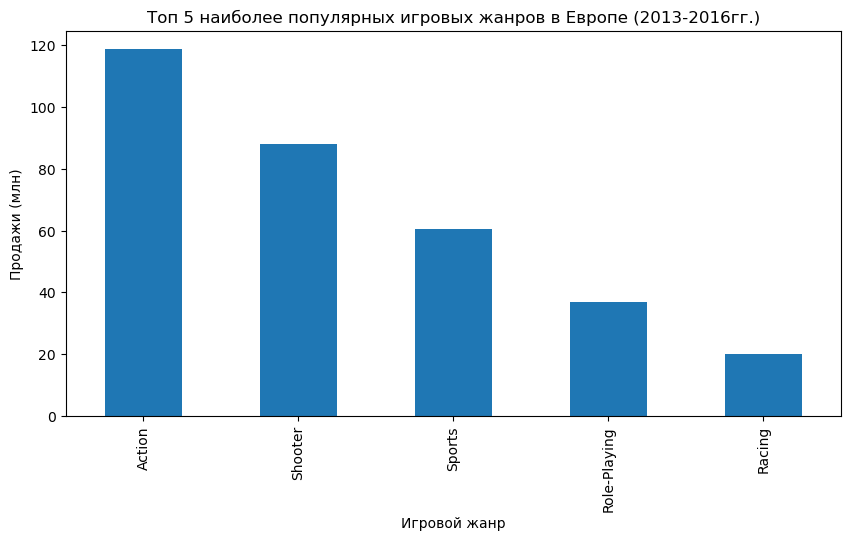

In [97]:
popular_genres_in_eu.plot.bar(
    title='Топ 5 наиболее популярных игровых жанров в Европе (2013-2016гг.)', 
    figsize=(10,5),
    xlabel='Игровой жанр',
    ylabel='Продажи (млн)',
    legend=False
);

Наиболее продаваемым в Европе являются игры в жанрах экшн, шутер, спортивные, ролевые и гонки.

In [98]:
rating_in_eu = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False)

In [99]:
display(rating_in_eu)

,eu_sales
rating,
M,145.80
E,83.36
RP,78.91
E10+,42.69
T,41.95


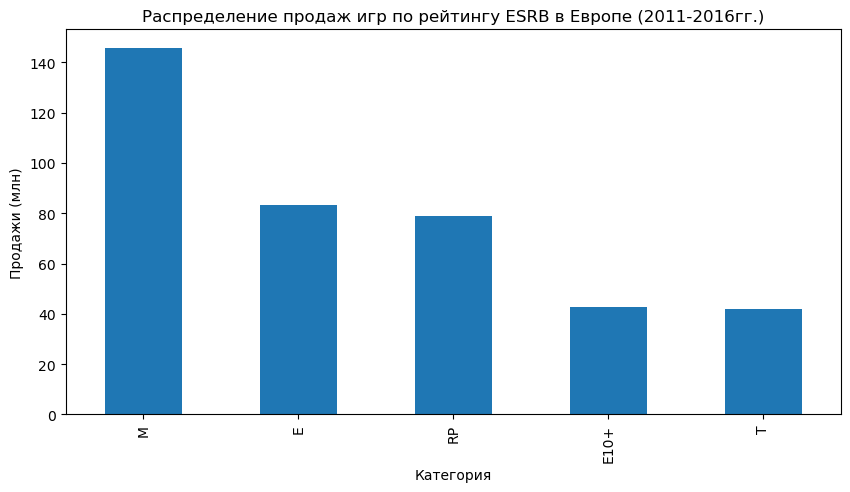

In [100]:
rating_in_eu.plot.bar(
    title='Распределение продаж игр по рейтингу ESRB в Европе (2011-2016гг.)', 
    figsize=(10,5),
    xlabel='Категория',
    ylabel='Продажи (млн)',
    legend=False
);

Наиболее продаваемыми в Европе, как и в Северной америке являются игры с рейтингом (17+) - их абсолютное большинство, их число в 1,5 раза превышает все остальные категории. Продажи в Европе игр этой категории ниже на 50млн, чем в Сев. Америке. На втором месте игры для всех без ограничения возраста, на 3 - игры, для которых рейтинг еще формируется, на 4 и 5 примерно с одинаковыми продажами располагаются игры для для тинейджеров и игры для всех от 10 лет.

#### Портрет пользователя Европы 2013-2016гг.

1. Наиболее популярные игровые **платформы**: PS4, PS3, XOne, X360, 3DS.
*Поскольку в рейтинг попали PS3 и PS4, следует посмотреть данные за меньший срок (2015-2016гг), так как 4-е поколение платформы предположительно должно со временем вытеснять 3-е.*

2. Топ-5 самых полулярных игровых **жанров**: экшн, шутер, спортивные, ролевые и гонки.
3. Наиболее продаваемыми являются игры с **рейтингом** (17+), на 2-м месте игры "для всех", на 3 - игры "без рейтинга" на 4 и 5 примерно с одинаковыми продажами располагаются игры "для всех (10+)" и для тинейджеров.

### JP (Япония)

In [101]:
top5_platforms_in_jp = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)

In [102]:
display(top5_platforms_in_jp)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


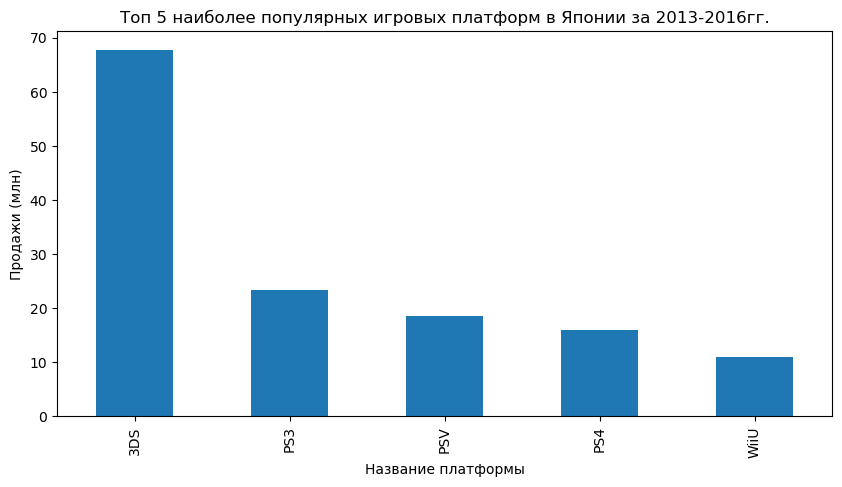

In [103]:
top5_platforms_in_jp.plot.bar(
    title= 'Топ 5 наиболее популярных игровых платформ в Японии за 2013-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

Судя по графику, наиболее популярной платформой в Японии является 3DS, на втором месте по продажам с отрвом почти в 3 раза PS3, на третьем и четвертом примерно с равными продажами PSV и PS4, и закмыкает пятерку самых популярных игровых платформ WiiU. 

In [104]:
top5_genres_in_jp = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)

In [105]:
display(top5_genres_in_jp)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


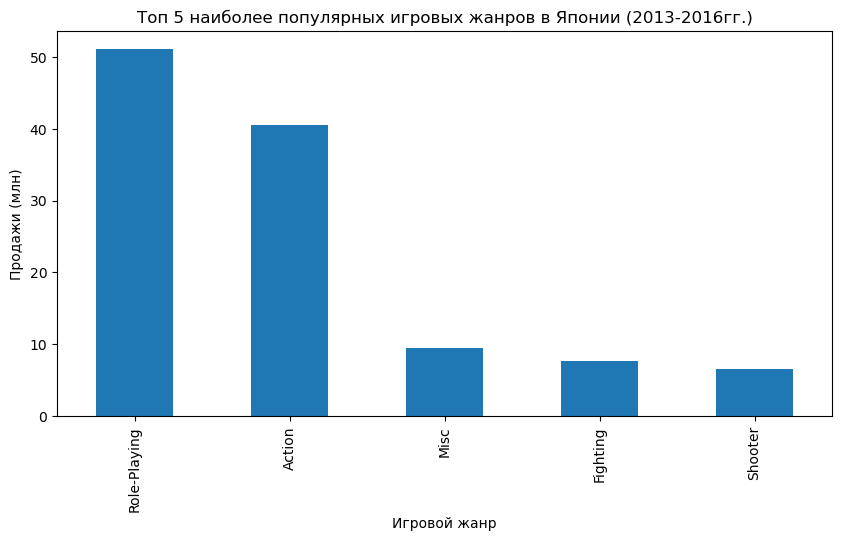

In [106]:
top5_genres_in_jp.plot.bar(
    title='Топ 5 наиболее популярных игровых жанров в Японии (2013-2016гг.)', 
    figsize=(10,5),
    xlabel='Игровой жанр',
    ylabel='Продажи (млн)',
    legend=False
);

Наиболее продаваемым в Японии являются игры в жанрах ролевых игр и экшн. Дале с большим отрывом следуют игры в смешанном жанре, файтинга и шутеры примерно с одинковыми продажами на уровене менее 10 млн копий.

In [107]:
rating_in_jp = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False)

In [108]:
display(rating_in_jp)

,jp_sales
rating,
RP,85.29
T,20.59
E,15.14
M,14.11
E10+,5.89


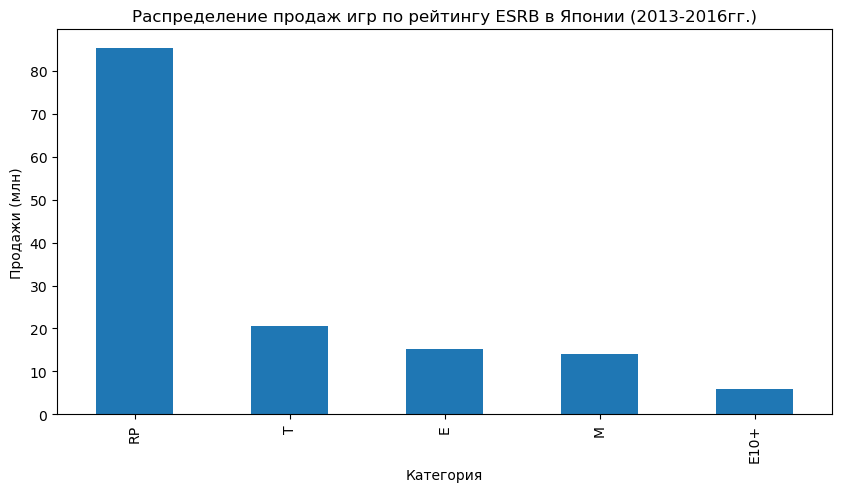

In [109]:
rating_in_jp.plot.bar(
    title='Распределение продаж игр по рейтингу ESRB в Японии (2013-2016гг.)', 
    figsize=(10,5),
    xlabel='Категория',
    ylabel='Продажи (млн)',
    legend=False
);

Результаты по рейтингу в Японии значительно отличаются от Северной Америки и Европы. Наиболее продаваемые в Японии игры не имеют рейтинга, так как ESRB-рейтинг применяется в США и игры, выпущенные в Японии для локального рынка, его не проходят. Таких игр абсолютно большинство, их число более чем в 4 раза превосходит все остальные категории. На 2, 3 и 4 месте располагаются игры для тинейджеров, для всех и 17+. А на последнем месте игры для всех в возрасте 10+. 

#### Портрет пользователя Японии 2013-2016гг.

1. Наиболее популярные игровые **платформы**: 3DS , на 2-м месте с отрывом почти в 3 раза PS3, далее - PSV, PS4 и WiiU. 

*Поскольку в рейтинг попали PS3 и PS4, следует посмотреть данные за меньший срок (2015-2016гг), так как 4-е поколение платформы предположительно должно со временем вытеснять 3-е.*

2. Топ-5 самых полулярных игровых **жанров**: лидируют ролевые игры и экшн, с большим отрывом далее идут игры в смешанном жанре, файтинг и платформеры.
3. Наиболее продаваемыми являются игры без **рейтинга**, далее с большим отрывом следуют игры "для всех", игры для тинейджеров, категория 17+ и игры "для всех (10+).

### Данные по 3 регионам за 2015-2016гг.

Рассмотрим данные за 2015-2016гг., так как картина могла измениться с 2011 года. Об этом свидетельсвуют графики, на которых в топ-5 попадают платформы разных поколений. Так как данные за 2016 год неполные. как изначально заявлено в ТЗ, возьмем провежуток за 2 года. Кроме того, такой промежуток покажет более актуальную картину, так как игровая сфера является одной из наиболее динамично развивающихся.

In [110]:
data_2015_2016 = data[data['year_of_release'] > 2014]

#### NA 2015-2016

In [111]:
platforms_in_na_2015_2016 = data_2015_2016.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)

In [112]:
display(platforms_in_na_2015_2016)

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


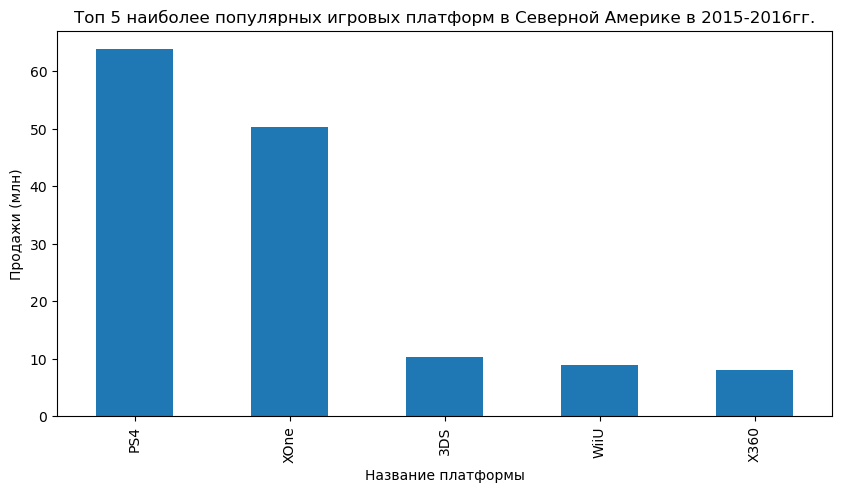

In [113]:
platforms_in_na_2015_2016.plot.bar(
    title= 'Топ 5 наиболее популярных игровых платформ в Северной Америке в 2015-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

Как и ожидалось, данные за 2016г. значительно отличаются от данные за 2011-2016гг. В лидерах платформа PS4, на втором месте XOne. Далее с большим отрывом следуют 3DS, WiiU и X360 на 3,4 и 5 месте соответственно.

In [114]:
top5_genres_in_na_2015_2016 = data_2015_2016.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)

In [115]:
display(top5_genres_in_na_2015_2016)

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


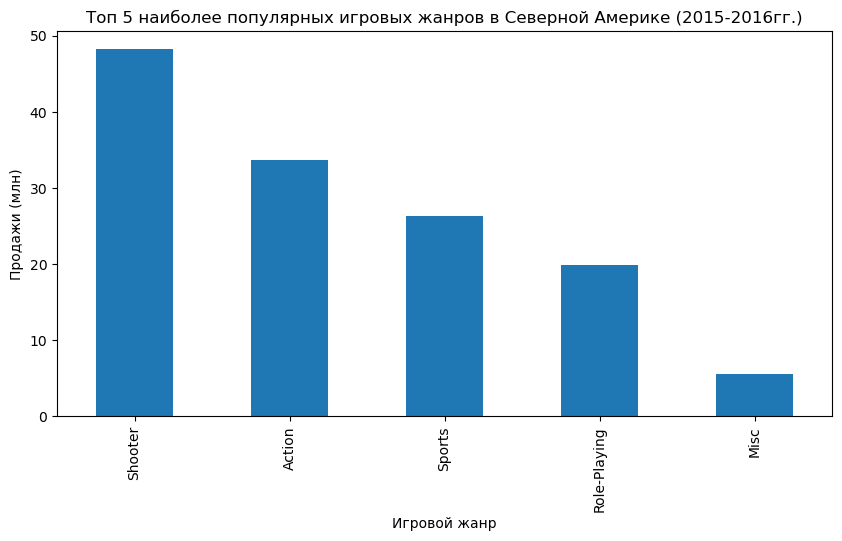

In [116]:
top5_genres_in_na_2015_2016.plot.bar(
    title='Топ 5 наиболее популярных игровых жанров в Северной Америке (2015-2016гг.)', 
    figsize=(10,5),
    xlabel='Игровой жанр',
    ylabel='Продажи (млн)',
    legend=False
);

Для жанров распределение осталось примерно таким же, единственное измнение заключается в том, что по данные 2011-2016гг жарн экш был был на первом, а шутер - на втором месте.

In [117]:
data_2015_2016['rating'] = data_2015_2016['rating'].fillna('RP')
display(data_2015_2016['rating'].value_counts())
display(data_2015_2016['rating'].isna().sum())

C:\Users\Neunerin\AppData\Local\Temp\ipykernel_19552\2139995316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015_2016['rating'] = data_2015_2016['rating'].fillna('RP')


RP      513
T       192
E       153
M       149
E10+    101
Name: rating, dtype: int64

0

In [118]:
rating_in_na_2015_2016 = data_2015_2016.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False)

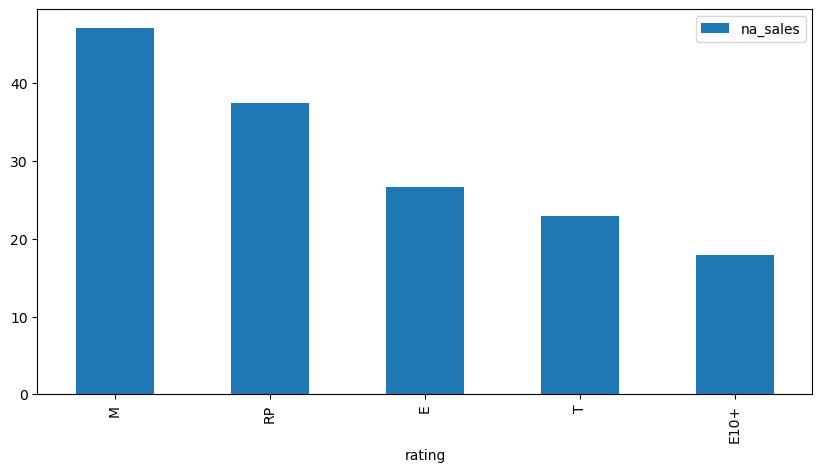

In [119]:
rating_in_na_2015_2016.plot.bar(figsize=(10,5));

Наиболее продаваемыми в Северной америке в 2015-2016гг остаеются игры с рейтингом (17+) . На втором месте игры без рейтинга, на 3,4 и 5  располагаются игры для всех без ограничения возраста, игры для тинейджеров и игры для всех (10+) соответственно. В данном случае единсвтенным совпадением с предыдущим срезом данных за 2011-2016гг. являются лидирующая позиция.

### Портрет пользователя Северной Америки 2015-2016гг.

1. Наиболее популярные игровые **платформы**: PS4, XOne. Далее с большим отрывом - 3DS, WiiU и X360.\
Для сравнения (2013-2016): PS4, XOne, X360, PS3 и 3DS.
*Рейтинг сильно изменился*

2. Топ-5 самых полулярных игровых **жанров**: шутер, экшн, спорт, ролевые и смешанный(misc).\
Для сравнения (2013-2016): экшн, шутер, спорт, ролевые и смешанный(misc). 

3. Наиболее продаваемыми являются игры с **рейтингом** (17+), игры без рейтинга, "для всех" без ограничения возраста, для тинейджеров, игры для всех (10+)\
Для сравнения (2013-2016): 17+, "для всех" без ограничения возраста, игры без рейтинга, игры "для всех (10+)" и игры для тинейджеров.

***Наиболее перспективны игры для PS4 и XOne в жанрах шутер, экшн, спорт и ролевые с рейтингом 17+.***

#### EU 2015-2016

In [120]:
platforms_in_eu_2015_2016 = data_2015_2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)

In [121]:
display(platforms_in_eu_2015_2016)

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


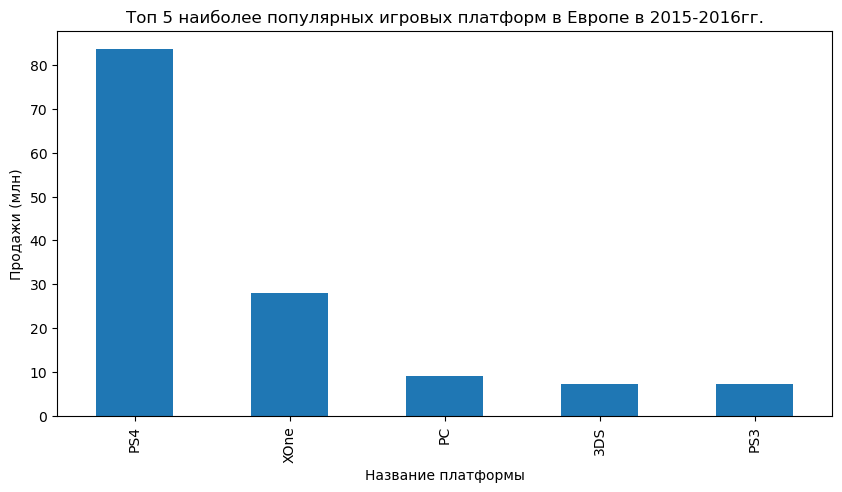

In [122]:
platforms_in_eu_2015_2016.plot.bar(
    title= 'Топ 5 наиболее популярных игровых платформ в Европе в 2015-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

Самой продаваемой платформой в 2015-16гг с большим отрывом явлется PS4. Далее с отрывом почти в 3 раза идет XOne. PC, 3DS и PS3 с примерно одинаковыми результатами продаж (менее 10 миллионов) замыкают топ.

In [123]:
top5_genres_in_eu_2015_2016 = data_2015_2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)

In [124]:
display(top5_genres_in_eu_2015_2016)

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


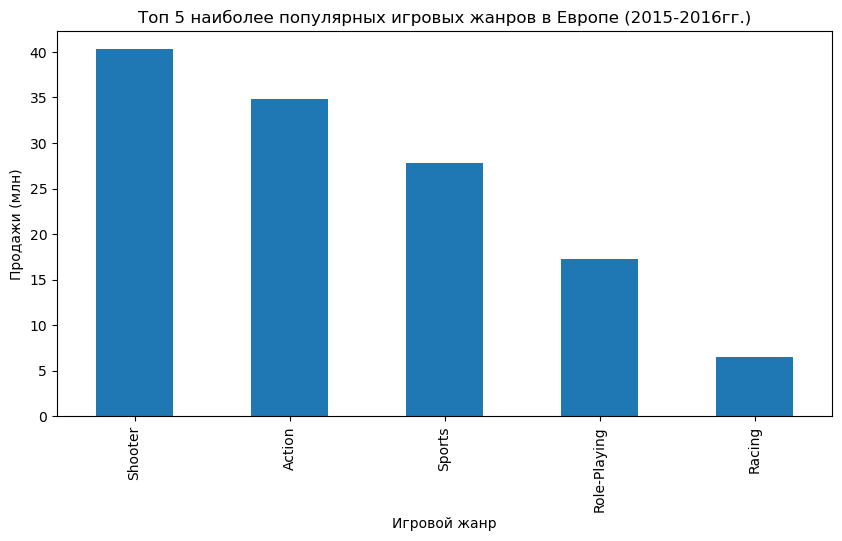

In [125]:
top5_genres_in_eu_2015_2016.plot.bar(
    title='Топ 5 наиболее популярных игровых жанров в Европе (2015-2016гг.)', 
    figsize=(10,5),
    xlabel='Игровой жанр',
    ylabel='Продажи (млн)',
    legend=False
);

Данные за 2015-2016 гг. практически идентичны данным за 2011-2016гг, единственное отличие состоит в том, что шутер вышел на первое место, сместив экш. На 3,4 и 5 месте так и остались спортивные, ролевые и гонки.

In [126]:
rating_in_eu_2015_2016 = data_2015_2016.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False)

In [127]:
display(rating_in_eu_2015_2016)

,eu_sales
rating,
M,45.54
RP,35.71
E,34.83
T,20.32
E10+,11.54


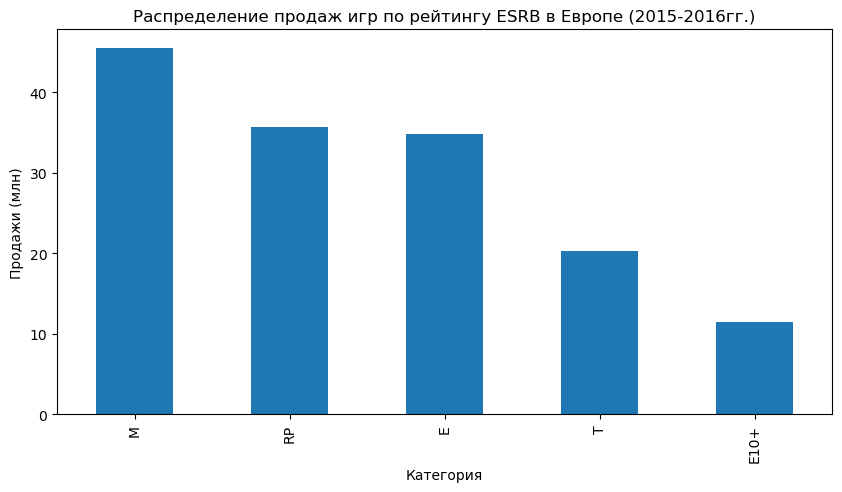

In [128]:
rating_in_eu_2015_2016.plot.bar(
    title='Распределение продаж игр по рейтингу ESRB в Европе (2015-2016гг.)', 
    figsize=(10,5),
    xlabel='Категория',
    ylabel='Продажи (млн)',
    legend=False
);

Наиболее продаваемыми в Европе в 2015-16гг, как и в 2011-2015 являются игры с рейтингом (17+). А вот второе и третье место поменялись: на втором месте игры, для которых рейтинг еще формируется, а на третьем теперь игры для всех без ограничения возраста, на 4 и 5 остались игры для для тинейджеров и игры для всех от 10 лет соответственно.

##### Портрет пользователя Европы 2015-2016гг.

1. Наиболее популярные игровые **платформы**: Абсолютный лидер - PS4. Далее с отрывом почти в 3 раза идет XOne. PC, 3DS и PS3 замыкают топ.
Для сравнения (2013-2016гг): PS4, PS3, XOne, X360, 3DS.

*Рейтинг сильно изменился*

2. Топ-5 самых полулярных игровых **жанров**: шутер, экшн, спортивные, ролевые и гонки.\
Для сравнения (2013-2016гг): экшн, шутер, спортивные, ролевые и гонки.
3. Наиболее продаваемыми являются игры с **рейтингом** (17+), "без рейтинга", игры "для всех", игры для тинейджеров и игры "для всех (10+).\
Для сравнения (2013-2016гг): (17+), игры "для всех", "без рейтинга", игры для тинейджеров и игры "для всех (10+).


***Наиболее перспективны игры для PS4 в жанрах экшн, шутер, спорт и ролевые с рейтингом 17+ и без возрастных ограничений.***

#### JP 2015-2016

In [129]:
top5_platforms_in_jp_2015_2016 = data_2015_2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)

In [130]:
display(top5_platforms_in_jp_2015_2016)

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


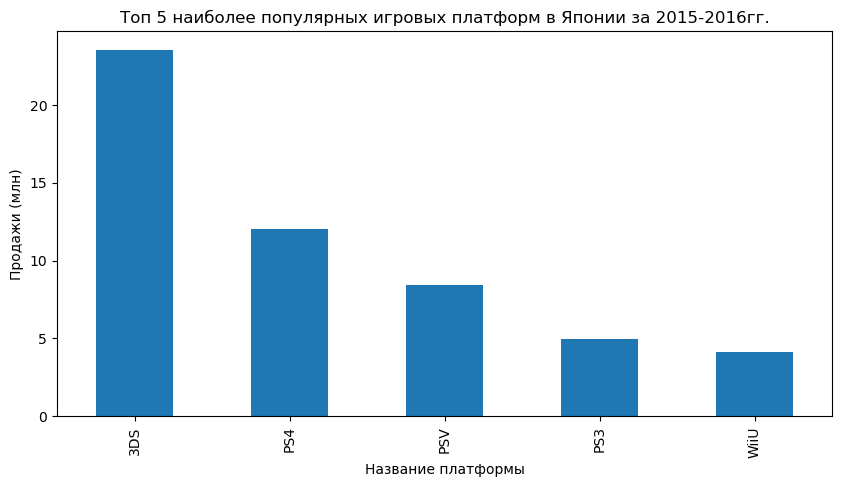

In [131]:
top5_platforms_in_jp_2015_2016.plot.bar(
    title= 'Топ 5 наиболее популярных игровых платформ в Японии за 2015-2016гг.', 
    figsize=(10,5),
    xlabel='Название платформы',
    ylabel='Продажи (млн)',
    legend=False
);

Судя по графику, наиболее популярной платформой в 2015-2016гг в Японии остается с большим отрывом 3DS, на втором месте по продажам с отрвом почти в 2 раза PS4 (которая в предыдущем срезе была лишь на пятом месте), на третьем и четвертом примерно с равными продажами PSP и PS3, и закмыкает пятерку самых популярных игровых платформ WiiU. Картина по платформам значительно изменилась.

In [132]:
top5_genres_in_jp_2015_2016 = data_2015_2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)

In [133]:
display(top5_genres_in_jp_2015_2016)

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


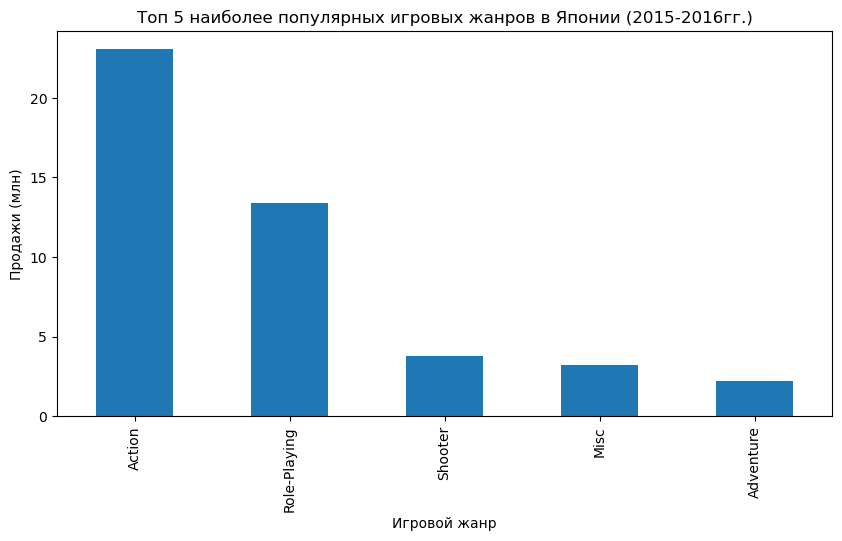

In [134]:
top5_genres_in_jp_2015_2016.plot.bar(
    title='Топ 5 наиболее популярных игровых жанров в Японии (2015-2016гг.)', 
    figsize=(10,5),
    xlabel='Игровой жанр',
    ylabel='Продажи (млн)',
    legend=False
);

Изменения также наблюдаются и среди предпочтений по жанрам.
Наиболее продаваемым в Японии в 2015-2016гг остаются игры в жанрах ролевых игр и экшн, однако теперь экшн вышел на первое место. Далее с большим отрывом следуют шутеры, игры в смешанном жанре и приключенческие. Из рейтинга выпали файтинг и платформеры. 

In [135]:
rating_in_jp_2015_2016 = data_2015_2016.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False)

In [136]:
display(rating_in_jp_2015_2016)

,jp_sales
rating,
RP,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


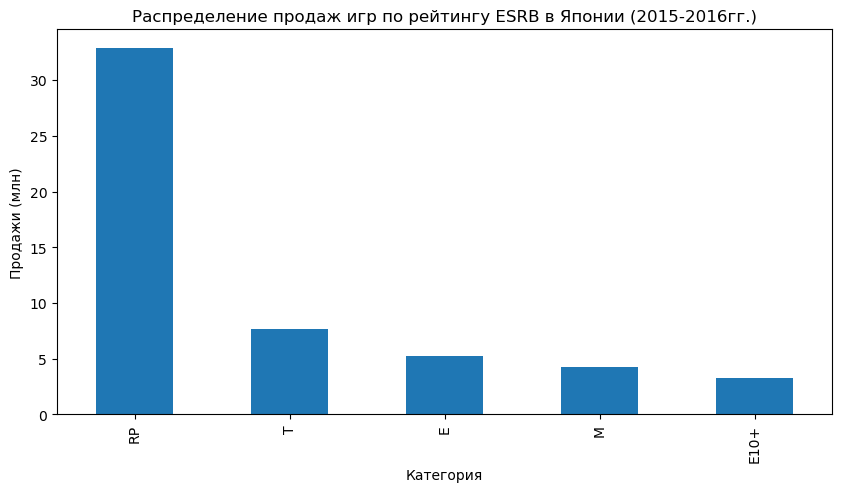

In [137]:
rating_in_jp_2015_2016.plot.bar(
    title='Распределение продаж игр по рейтингу ESRB в Японии (2015-2016гг.)', 
    figsize=(10,5),
    xlabel='Категория',
    ylabel='Продажи (млн)',
    legend=False
);

Значительных изменений в отношении предпочтительного рейтинга не наблюдается. Наиболее продаваемыми в 2015-16гг остались игры без рейтинга, однако второе и третье место поменялись местами: на второе место  вышли игры для тинейджеров, а на третье опустились игры без возрастных ограничений. Четвертое и 5 песта остались без изменений.

##### Портрет пользователя Японии 2015-2016гг.

1. Наиболее популярные игровые **платформы**: Лидер с большим отрывом - 3DS, далее PS4, PSP. Наименьшие продажи у PS3, WiiU. \
Для сравнения (2013-2016гг): 3DS , на 2-м месте с отрывом почти в 3 раза PS3, далее - PSV, PS4 и WiiU.
*Рейтинг сильно изменился*

2. Топ-5 самых полулярных игровых **жанров**: экшн лидирует, на втором месте ролевые. Далее с большим отрывом - шутеры, игры в смешанном жанре и приключенческие.\
Для сравнения (2013-2016гг): лидируют ролевые игры и экшн, с большим отрывом далее идут игры в смешанном жанре, файтинг и шутеры. 

3. Наиболее продаваемыми являются игры без **рейтинга**, игры для тинейджеров, игры без возрастных ограничений, категория 17+ и игры "для всех (10+).\
Для сравнения (2013-2016гг): без **рейтинга**, далее с большим отрывом следуют игры "для всех", игры для тинейджеров, категория 17+ и игры "для всех (10+).

Примерчание: Рейтинг ESBR является американским и не применяется к играм, выпущенным в Японии для локального рынка.

***Наиболее перспективны игры для 3DS в жанрах ролевые и экшн.***

## Проверка гипотез

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [138]:
xone = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna() #избавимся от nan
pc = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()

In [139]:
st.levene(pc, xone, center='mean') #проверим дисперсии

LeveneResult(statistic=11.33254345853662, pvalue=0.0008493003748626767)

По результатам теста Левена pvalue<0.05, что говорит о том, что дисперсии разные. Укажем это при применении критерия.

In [140]:
xone_user_score_mean = xone.mean()
pc_user_score_mean = pc.mean()

print('Средний пользовательский рейтинг Xbox One:', xone_user_score_mean)
print('Средний пользовательский рейтинг PC:', pc_user_score_mean)

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(xone, pc, equal_var = False) 
#критерий проверки для двух независимых выборок с разными дисперсиями

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг Xbox One: 6.52142857142857
Средний пользовательский рейтинг PC: 6.2803797468354405
p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


По результатам p-значение сильно превышает критический уровень статистической значимости, поэтому нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не может быть отвергнута. Изначальная формулировка гипотезы отвечает формату нулевой гипотезы. Альтернативную гипотезу можно было бы сформулировать как "рейтинги платформ различаются". Таким образом мы бы получили двустороннюю альтернативную гипотезу, или "рейтинг Xbox One больше (или меньше) рейтинга PC", - в таком случае мы получили бы один из вариантов односторонней гипотезы. 
p-значение — величина, используемая при тестировании статистических гипотез, другими словами, это вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (в нашем случае - среднего), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна. Проще говоря, это вероятность ошибки при отклонении нулевой гипотезы. В данном случае вероятность ошибки при отлонении нулевой гипотезы = 0.68 (около 70%), поэтому отвергнуть нулевую гипотезу не представляется возможным. 

### Средние пользовательские рейтинги жанров Action и Sports разные

In [141]:
action = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

In [142]:
st.levene(action, sports, center='mean')

LeveneResult(statistic=28.83396835053972, pvalue=1.165143477411665e-07)

По результатам теста Левена pvalue>0.05, что говорит о том, что дисперсии разные. 

In [143]:
action_user_score_mean = xone.mean()
sports_user_score_mean = pc.mean()

print('Средний пользовательский жанра Action:', action_user_score_mean)
print('Средний пользовательский рейтинг жанра Sports:', sports_user_score_mean)

alpha = .05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу: рейтинги разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу: рейтинги одинаковые')

Средний пользовательский жанра Action: 6.52142857142857
Средний пользовательский рейтинг жанра Sports: 6.2803797468354405
p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу: рейтинги разные


В данном случае следует отметить, что нулевая гипотеза формулируется согласно правилам следующим образом: рейтинги жанров Action и Sports равны.
Согласно полученным результатам нулевую гипотезу можно отвергнуть. Однако это не означает, что мы можем безусловно принять при этомальтернативную двустороннюю гипотезу о том, что пользовательствие рейтинги жанров разные. Наши результаты могут лишь не противоречить ей или показывать крайне маловероятные результаты.

## Выводы: 

1. Изначально была произведена **преобработка данных**: 
    - названия столбцов приведены к змеиному регистру;
    - типы данных были заменены в столбцах year_of_release на целочисленные, а в user_score произведена замена значения tbd(to be decided) на nan для удобства дальнейшего анализа.   
    - были обработаны пропуски: наибольшее количество пропусков в столбцах critic_score, user_score и rating. Отсутствие данных в этих столбцах, можно объяснить тем, что некоторые игры вышли до появления общих рейтингов критиков и пользователей. Были удалены 2 строки, где отсутствовало название игр. В столбце year_of_release пропущенные данные были частично заполнены по названиям игр при совпадении.
    - был добавлен столбец total_sale c суммарными продажами по всем регионам.
2. Далее был проведен **исследовательский анализ данных:**
   - была рассмотрена динамика измнения количества выпускаемых игр по годам: до 1993 года количество выпускаемых игр было примерно одинаково низким. С 1993 по 2008 можно отметить значительное повышения количества релизов (за исключением пары незначительных спадов), после чего объем выпускаемых игр стал снижаться. Наибольший спад с 2009 года наблюдается в 2012 года, когда количество выпускаемых игр опустилось ниже уровня 2002 года. Это можеть объясняться тем, что в конце двухтысячных (примерно в 2008-2009) появилась альтернатива игровым платформам, что заметно повлияло на количество выпускаемых игр.
   - на основе анализа данных был сделан вывод о том, что средний цикл жизни платформы составляет около 10 лет, а пик продаж приходится примерно на середину цикла (около 5 лет после релиза), то есть потенциально прибыльными на 2017 год можно считать платформы, выпущенные в 2011г. и позже. Таким образом, дальнейший анализ производился на данных с 2011 по 2016 год. Наиболее прибыльными были определены платформы: 3DS, PS3, PS4, PSV, WiiU, XOne. Среди них по графику размаха была выбрана XOne как наиболее перспективная. При этом продажи по всем платформам падают.
   - при проверке влияния отзывов пользователей и критиков на продажи внутри вышеназванных платформ было установлено, корреляция ранжируется от нулевой до слабой. На основании этого был сделан вывод, что в целом оценки критиков и пользователей практически не оказывают влияния на глобальные продажи. В качестве исключения можно выделить платформы XOne, PS3 и X360, при анализе которых была отмечена слабая корреляция между оченками критиков и продажами, что говорит о том, что покупатели игр обращают внимание на мнение критиков, и платформу WiiU, при покупке игр для которой пользователя обращают внимание на оценки других пользователей.
   - при проверке распределения по жанрам было установлено, что по количеству выпущенных игр за все годы лидирует жанр экш, далее с большим отрывом идут все остальные жанры . Наименьшее число релизом в жанрах стратегии и паззла. По суммарным продажам лидируют экшн и шутер. Наиболее низкие продажи у игр в жанрах strategy и puzzle. По медианне продаж: очевидный лидер - шутер, минимальные продажи у adventure. 
4. **Портреты пользователей различных регионов за актуальный период**: изначально были рассмотрены данные за 2011-2016гг, однако анализ показал, что в отношении платформ данные могут быть устаревшими, так как среди самых продаваемых встречались разные поколения одной и той же платформы. Кроме того, 2 плаформы появились в 2013 году, поэтому во избежании искажения данных созданием преимуществ для ранее выпущенных платформ было принято решение анализироваданные за 2013-2016гг. Однако данные за этот период все еще содержали платформы разных поколений. Поэтому были проанализирвоаны данные за 2015-2016гг. Было принято решение опираться на более новые данные в отношении продаж платформ при составлении портретов пользователей. Данные по жанрам игр и рейтинг не претерпели сильных изменений.
    
    4.1 Портрет пользователя Северной Америки 2015-2016
    - Наиболее популярные игровые платформы: PS4, XOne. Далее с большим отрывом - 3DS, WiiU и X360. Для сравнения (2013-2016): PS4, PS3, XOne, X360, 3DS.
    - Топ-5 самых полулярных игровых жанров: шутер, экшн, спорт, ролевые и смешанный(misc).
    - Наиболее продаваемыми являются игры с рейтингом (17+), игры без рейтинга, "для всех" без ограничения возраста, для тинейджеров, игры для всех (10+)

**Рекомендация: наиболее перспективны на 2017г. игры для PS4 и XOne с рейтингом 17+ в жанрах шутер, экшн, спорт и ролевые.**

      4.2 Портрет пользователя Европы 2015-2016гг.
    - Наиболее популярные игровые платформы: Абсолютный лидер - PS4. Далее с отрывом почти в 3 раза идет XOne. PC, 3DS и PS3 замыкают топ. Для сравнения (2013-2016гг): PS4, PS3, XOne, X360, 3DS.
    - Топ-5 самых полулярных игровых жанров: шутер, экшн, спортивные, ролевые и гонки.
    - Наиболее продаваемыми являются игры с рейтингом (17+), "без рейтинга", игры "для всех", игры для тинейджеров и игры "для всех (10+).

**Рекомендация: наиболее перспективны на 2017г. игры для PS4 с рейтингом 17+ и без возрастных ограниченийв жанрах экшн, шутер, спорт и ролевые.**

    4.3 Портрет пользователя Японии 2015-2016гг.
    - Наиболее популярные игровые платформы: Лидер с большим отрывом - 3DS, далее PS4, PSP. Наименьшие продажи у PS3, WiiU. Для сравнения (2013-2016гг): 3DS , на 2-м месте с отрывом почти в 3 раза PS3, далее - PSV, PS4 и WiiU.
    - Топ-5 самых полулярных игровых жанров: экшн лидирует, на втором месте ролевые. Далее с большим отрывом - шутеры, игры в смешанном жанре и приключенческие.
    - Наиболее продаваемыми являются игры без рейтинга, игры для тинейджеров, игры без возрастных ограничений, категория 17+ и игры "для всех (10+).

**Рекомендация: наиболее перспективны на 2017г. игры для 3DS (возможно также PS4) в жанрах ролевые и экшн без рейтинга.**

5. **Проверка гипотез** показала, что средние пользовательские рейтинги платформ Xbox One и PC равны, а рейтинги жанров Action и Sports различаются. 
